# Pipeline End-to-End untuk Regresi Model Machine Learning

## 1. Persiapan Lingkungan Kerja
Pertama, mari kita impor semua library yang diperlukan:

In [1]:
from google.colab import drive
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.feature_selection import VarianceThreshold, SelectKBest, f_regression, mutual_info_regression, chi2
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor, AdaBoostRegressor, GradientBoostingRegressor, BaggingClassifier
from sklearn.svm import SVR, SVC
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.pipeline import Pipeline
import warnings
warnings.filterwarnings('ignore')

# Set visualisasi
plt.style.use('seaborn-v0_8-whitegrid')
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12
sns.set_palette("viridis")

## 2. Pengumpulan & Pembersihan Data
Data diimoport melalui link: https://drive.google.com/file/d/1sJC9oDOTiVApJ3s5jUXBfB8X0RL_Rkyv/view?usp=sharing yang tersimpan dalam folder Drive pribadi. Disimpan dalam variabel `df`.

Karena tidak ada missing values pada dataset, maka tidak perlu dilakukan pembersihan data.

In [2]:
# Connecting to Google Drive
drive.mount('/content/drive')

# Importing Dataset
df = pd.read_csv('/content/drive/MyDrive/Belajar (PTA TA)/Tempat Belajar/RegresiUTSTelkom.csv', header=None)

# Display  dataset
df.info()
df.describe()
df.head()

Mounted at /content/drive
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 515345 entries, 0 to 515344
Data columns (total 91 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   0       515345 non-null  int64  
 1   1       515345 non-null  float64
 2   2       515345 non-null  float64
 3   3       515345 non-null  float64
 4   4       515345 non-null  float64
 5   5       515345 non-null  float64
 6   6       515345 non-null  float64
 7   7       515345 non-null  float64
 8   8       515345 non-null  float64
 9   9       515345 non-null  float64
 10  10      515345 non-null  float64
 11  11      515345 non-null  float64
 12  12      515345 non-null  float64
 13  13      515345 non-null  float64
 14  14      515345 non-null  float64
 15  15      515345 non-null  float64
 16  16      515345 non-null  float64
 17  17      515345 non-null  float64
 18  18      515345 non-null  float64
 19  19      515345 non-null  float64
 20  20      515345 non-nul

,0,1,2,3,4,5,6,7,8,9,...,81,82,83,84,85,86,87,88,89,90
0,2001,49.94357,21.47114,73.07750,8.74861,-17.40628,-13.09905,-25.01202,-12.23257,7.83089,...,13.01620,-54.40548,58.99367,15.37344,1.11144,-23.08793,68.40795,-1.82223,-27.46348,2.26327
1,2001,48.73215,18.42930,70.32679,12.94636,-10.32437,-24.83777,8.76630,-0.92019,18.76548,...,5.66812,-19.68073,33.04964,42.87836,-9.90378,-32.22788,70.49388,12.04941,58.43453,26.92061
2,2001,50.95714,31.85602,55.81851,13.41693,-6.57898,-18.54940,-3.27872,-2.35035,16.07017,...,3.03800,26.05866,-50.92779,10.93792,-0.07568,43.20130,-115.00698,-0.05859,39.67068,-0.66345
3,2001,48.24750,-1.89837,36.29772,2.58776,0.97170,-26.21683,5.05097,-10.34124,3.55005,...,34.57337,-171.70734,-16.96705,-46.67617,-12.51516,82.58061,-72.08993,9.90558,199.62971,18.85382
4,2001,50.97020,42.20998,67.09964,8.46791,-15.85279,-16.81409,-12.48207,-9.37636,12.63699,...,9.92661,-55.95724,64.92712,-17.72522,-1.49237,-7.50035,51.76631,7.88713,55.66926,28.74903


1. dataset memiliki fitur numerik (90 kolom float64 dan 1 kolom int64)
2. Semua kolom terisi penuh tanpa ada nilai yang hilang
3. Kolom pertama (kolom 0) tampaknya berisi tahun 2001 untuk setidaknya 5 baris pertama
4. Kolom yang tersisa (1-90) berisi berbagai nilai floating point

## 3. Feature Selection

### a. Menghilangkan fitur dengan variansi konstan atau quasi-konstan

In [3]:
# Mencari fitur dengan variansi rendah (konstan atau quasi-konstan)
def remove_constant_features(df, threshold=0.01):
    selector = VarianceThreshold(threshold=threshold)
    selector.fit(df)
    constant_features = [column for column, include in zip(df.columns, selector.get_support()) if not include]
    print(f"Fitur konstan atau quasi-konstan: {constant_features}")
    return df.loc[:, selector.get_support()]

# Membagi data menjadi fitur (X) dan target (Y)
# Asumsikan kolom pertama (0) adalah tahun, dan kolom terakhir (90) adalah target
X = df.iloc[:, 1:] # Fitur dari kolom 2 sampai kolom terakhir
y = df.iloc[:, 0]    # Target adalah kolom pertama

print("Jumlah fitur awal:", X.shape[1])
X_var = remove_constant_features(X)
print("Jumlah fitur setelah menghilangkan fitur konstan:", X_var.shape[1])

Jumlah fitur awal: 90
Fitur konstan atau quasi-konstan: []
Jumlah fitur setelah menghilangkan fitur konstan: 90


### b. Menghilangkan fitur yang saling berkorelasi tinggi

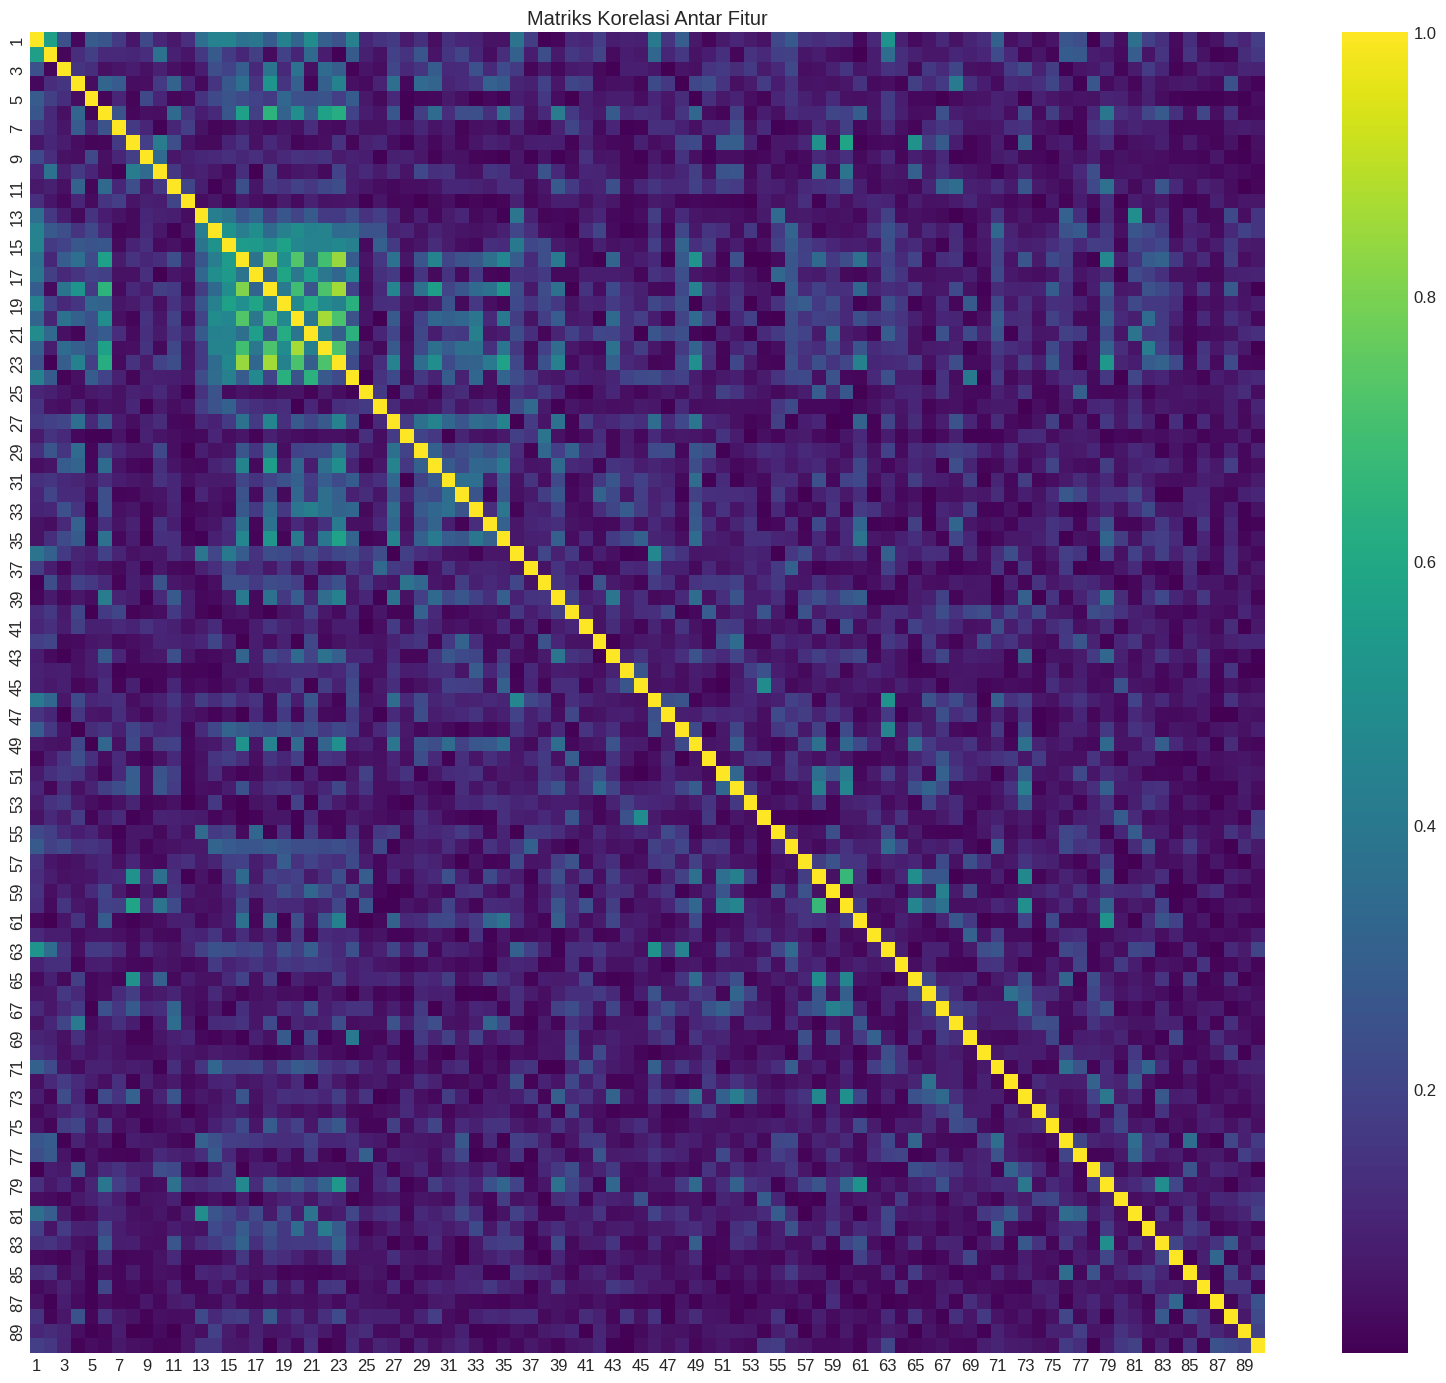

Jumlah fitur yang akan dihapus karena berkorelasi tinggi: 3
Jumlah fitur setelah menghilangkan fitur berkorelasi tinggi: 87


In [4]:
def correlation_selection(X, threshold=0.8):
    # Menghitung matriks korelasi
    corr_matrix = X.corr().abs()

    # Buat plot heatmap korelasi
    plt.figure(figsize=(16, 14))
    sns.heatmap(corr_matrix, cmap='viridis', annot=False)
    plt.title('Matriks Korelasi Antar Fitur')
    plt.tight_layout()
    plt.show()

    # Mendapatkan pasangan fitur dengan korelasi tinggi
    upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

    # Fitur yang akan dihapus
    to_drop = [column for column in upper.columns if any(upper[column] > threshold)]

    print(f"Jumlah fitur yang akan dihapus karena berkorelasi tinggi: {len(to_drop)}")

    # Mengembalikan dataset tanpa fitur berkorelasi tinggi
    return X.drop(to_drop, axis=1)

X_corr = correlation_selection(X_var)
print("Jumlah fitur setelah menghilangkan fitur berkorelasi tinggi:", X_corr.shape[1])

### c. Feature Selection dengan Mutual Information

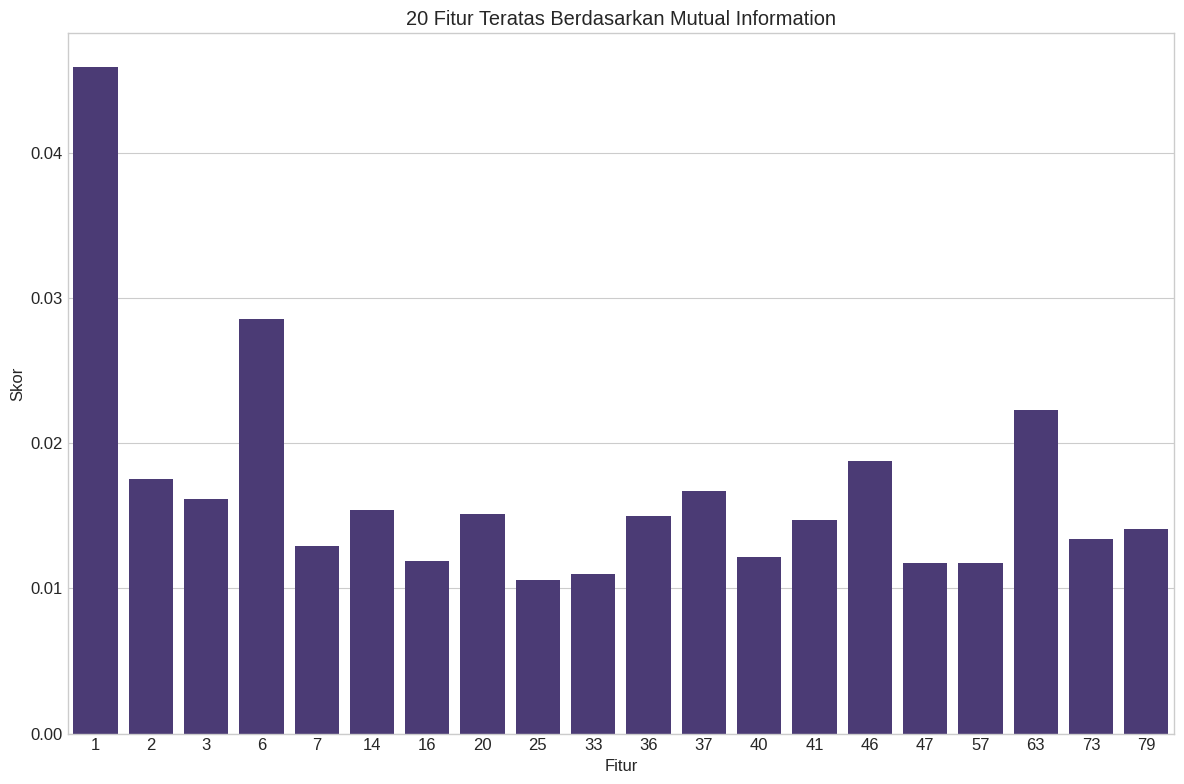

Fitur terpilih berdasarkan Mutual Information: [1, 2, 3, 6, 7, 14, 16, 20, 25, 33, 36, 37, 40, 41, 46, 47, 57, 63, 73, 79]


In [5]:
def mutual_info_selection(X, y, k=20):
    # Memilih fitur dengan Mutual Information
    selector = SelectKBest(mutual_info_regression, k=k)
    selector.fit(X, y)

    # Mendapatkan skor untuk setiap fitur
    scores = selector.scores_
    features = X.columns

    # Menampilkan skor untuk setiap fitur
    feature_scores = pd.DataFrame({'Fitur': features, 'Skor': scores})
    feature_scores = feature_scores.sort_values('Skor', ascending=False)

    # Visualisasi
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Fitur', y='Skor', data=feature_scores.head(20))
    plt.title('20 Fitur Teratas Berdasarkan Mutual Information')
    plt.tight_layout()
    plt.show()

    # Mengembalikan fitur terpilih
    selected_features = X.columns[selector.get_support()]
    return X[selected_features], selected_features

X_mi, selected_features_mi = mutual_info_selection(X_corr, y)
print("Fitur terpilih berdasarkan Mutual Information:", list(selected_features_mi))

## 4. Pembagian Data

Sekarang kita bagi data menjadi data latih dan data uji:

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X_mi, y, test_size=0.2, random_state=42)
print("Ukuran data latih:", X_train.shape)
print("Ukuran data uji:", X_test.shape)

Ukuran data latih: (412276, 20)
Ukuran data uji: (103069, 20)


## 5. Feature Engineering

### a. Normalisasi Fitur

In [7]:
# Normalisasi dengan StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Konversi kembali ke DataFrame
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

# Melihat statistik setelah scaling
print("\nStatistik setelah scaling:")
print(X_train_scaled.describe().T[['mean', 'std', 'min', 'max']])



Statistik setelah scaling:
            mean       std        min        max
1  -1.133281e-15  1.000001  -6.710932   3.062300
2   2.343911e-18  1.000001  -6.559936   7.420539
3  -3.107405e-17  1.000001  -8.780687   8.909378
6  -1.480800e-16  1.000001  -5.612070  13.647225
7   2.162947e-17  1.000001  -9.794288  11.992091
14  1.382046e-16  1.000001  -1.388011  36.189915
16  3.095341e-16  1.000001  -1.370286  27.747009
20 -1.633671e-16  1.000001  -1.651826  29.228988
25 -9.711718e-18  1.000001 -23.561963  13.911681
33 -4.646458e-17  1.000001 -22.692326  38.679440
36 -1.163338e-19  1.000001 -15.547552  22.443808
37 -3.791620e-18  1.000001 -20.217857  34.191910
40 -4.429302e-18  1.000001 -19.431256  29.836179
41 -4.067374e-18  1.000001 -38.926076  29.483170
46 -3.353860e-17  1.000001 -24.268953  21.652619
47 -2.071603e-17  1.000001 -31.794616  19.111781
57  2.147436e-17  1.000001 -16.808761  28.303521
63  1.302939e-17  1.000001 -15.208382  21.545893
73  1.849277e-17  1.000001 -51.215729  13

## 6. Pemodelan dan Evaluasi

Mari buat fungsi untuk mengevaluasi model:

In [8]:
def evaluate_model(model, X_train, X_test, y_train, y_test, model_name):
    # Latih model
    model.fit(X_train, y_train)

    # Prediksi
    y_pred_train = model.predict(X_train)
    y_pred_test = model.predict(X_test)

    # Hitung metrik
    mse_train = mean_squared_error(y_train, y_pred_train)
    rmse_train = np.sqrt(mse_train)
    r2_train = r2_score(y_train, y_pred_train)

    mse_test = mean_squared_error(y_test, y_pred_test)
    rmse_test = np.sqrt(mse_test)
    r2_test = r2_score(y_test, y_pred_test)

    # Tampilkan hasil
    print(f"\n--- Model: {model_name} ---")
    print(f"MSE Train: {mse_train:.4f}, Test: {mse_test:.4f}")
    print(f"RMSE Train: {rmse_train:.4f}, Test: {rmse_test:.4f}")
    print(f"R² Train: {r2_train:.4f}, Test: {r2_test:.4f}")

    # Visualisasi hasil prediksi vs aktual
    plt.figure(figsize=(12, 5))

    # Plot untuk data test
    plt.subplot(1, 2, 1)
    plt.scatter(y_test, y_pred_test, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.xlabel('Nilai Aktual')
    plt.ylabel('Prediksi')
    plt.title(f'Prediksi vs Aktual ({model_name}) - Data Uji')

    # Plot residual
    plt.subplot(1, 2, 2)
    residuals = y_test - y_pred_test
    plt.scatter(y_pred_test, residuals, alpha=0.5)
    plt.axhline(y=0, color='r', linestyle='--')
    plt.xlabel('Prediksi')
    plt.ylabel('Residual')
    plt.title('Residual Plot - Data Uji')

    plt.tight_layout()
    plt.show()

    return {
        'model': model,
        'model_name': model_name,
        'mse_test': mse_test,
        'rmse_test': rmse_test,
        'r2_test': r2_test,
        'y_pred_test': y_pred_test
    }


### a. Linear Regression


--- Model: Linear Regression ---
MSE Train: 96.1394, Test: 95.3515
RMSE Train: 9.8051, Test: 9.7648
R² Train: 0.1962, Test: 0.1988


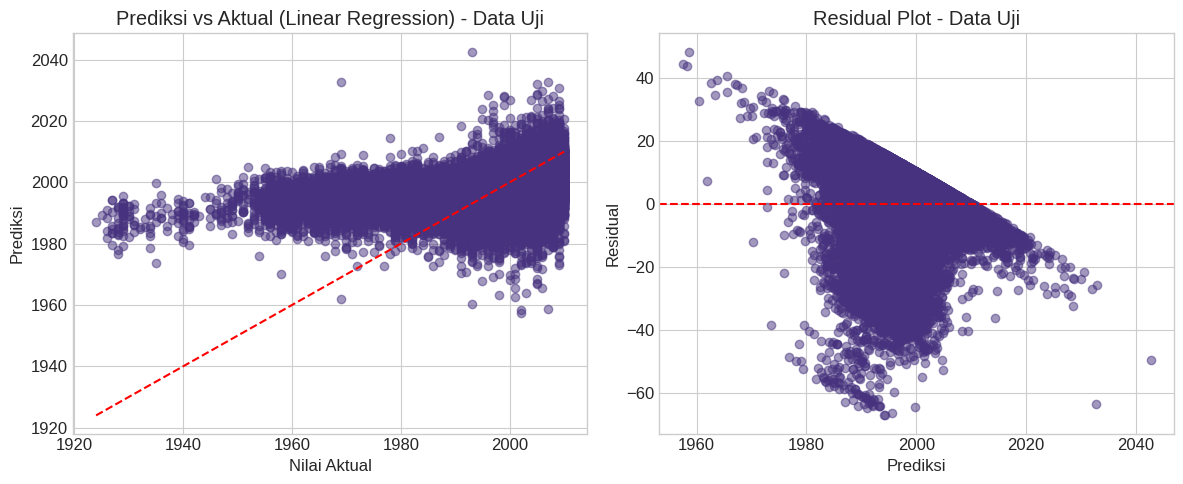

In [9]:
# Model Linear Regression
lr_model = LinearRegression()
lr_results = evaluate_model(lr_model, X_train_scaled, X_test_scaled, y_train, y_test, "Linear Regression")

### b. Polynomial Regression


--- Model: Polynomial Regression (degree=2) ---
MSE Train: 89.3188, Test: 89.2317
RMSE Train: 9.4509, Test: 9.4463
R² Train: 0.2532, Test: 0.2502


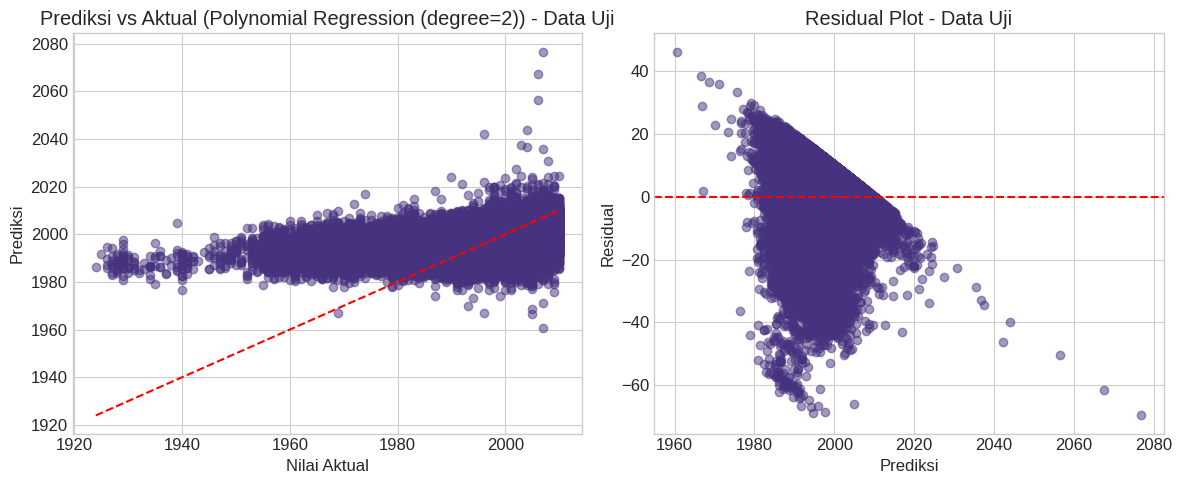

In [10]:
# Model Polynomial Regression
poly_degree = 2
poly = PolynomialFeatures(degree=poly_degree)
X_train_poly = poly.fit_transform(X_train_scaled)
X_test_poly = poly.transform(X_test_scaled)

poly_lr_model = LinearRegression()
poly_results = evaluate_model(poly_lr_model, X_train_poly, X_test_poly, y_train, y_test, f"Polynomial Regression (degree={poly_degree})")


### c. Decision Tree Regressor


--- Model: Decision Tree ---
MSE Train: 0.0000, Test: 179.1502
RMSE Train: 0.0045, Test: 13.3847
R² Train: 1.0000, Test: -0.5053


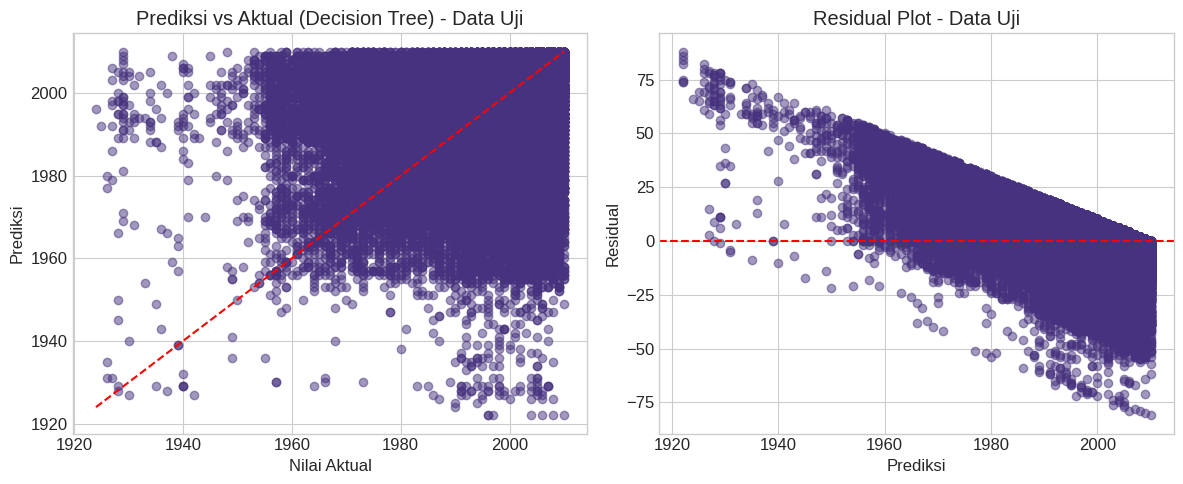

In [11]:
# Model Decision Tree
dt_model = DecisionTreeRegressor(random_state=42)
dt_results = evaluate_model(dt_model, X_train_scaled, X_test_scaled, y_train, y_test, "Decision Tree")

### d. K-Neighbors Regressor


--- Model: KNN (n=5) ---
MSE Train: 63.0067, Test: 94.1593
RMSE Train: 7.9377, Test: 9.7036
R² Train: 0.4732, Test: 0.2088


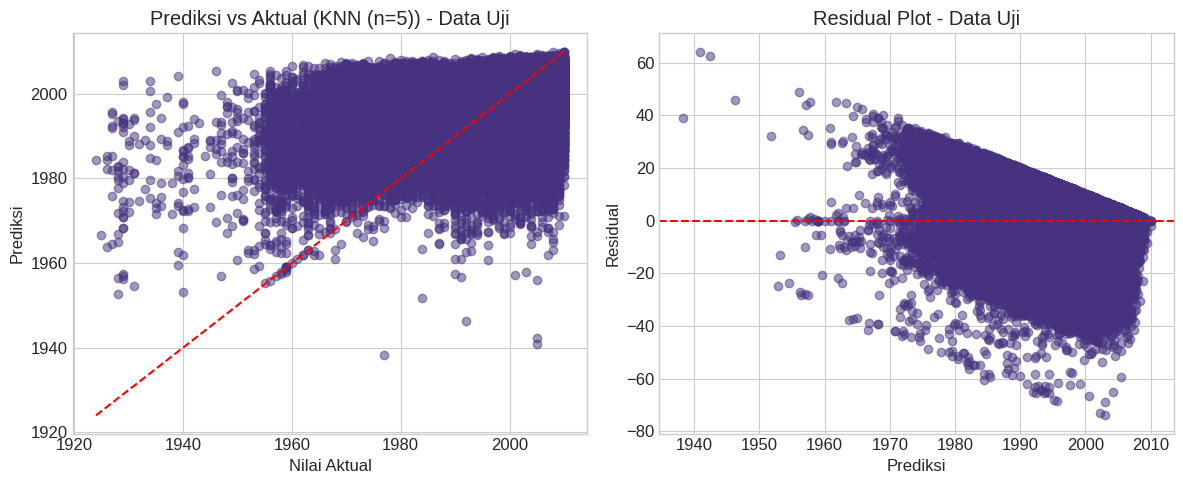

In [12]:
# Model KNN
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_results = evaluate_model(knn_model, X_train_scaled, X_test_scaled, y_train, y_test, "KNN (n=5)")

### e. Bagging Regressor


--- Model: Bagging Regressor ---
MSE Train: 16.9269, Test: 93.3425
RMSE Train: 4.1142, Test: 9.6614
R² Train: 0.8585, Test: 0.2157


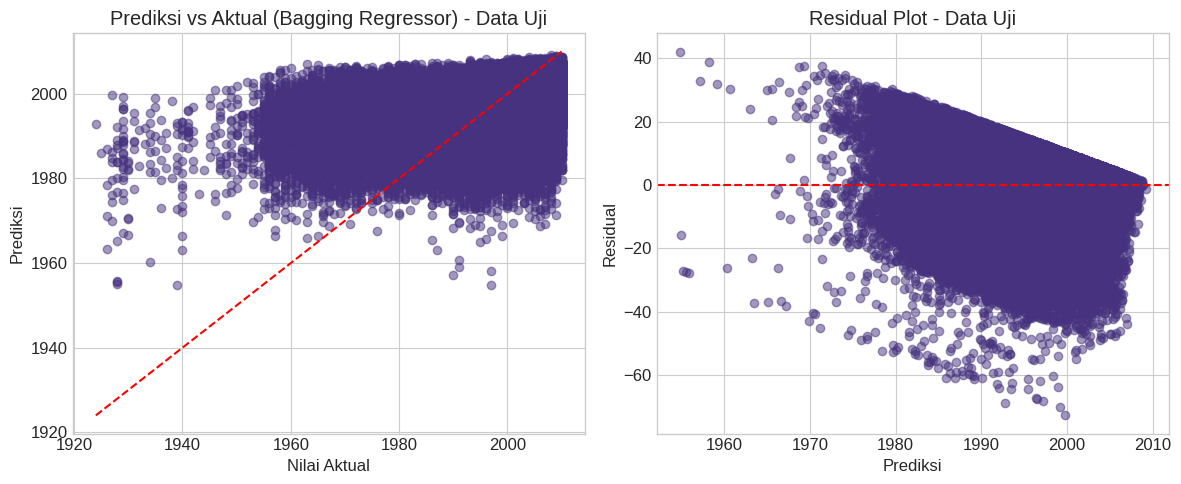

In [13]:
# Model Bagging
bagging_model = BaggingRegressor(random_state=42)
bagging_results = evaluate_model(bagging_model, X_train_scaled, X_test_scaled, y_train, y_test, "Bagging Regressor")

### f. AdaBoost Regressor


--- Model: AdaBoost Regressor ---
MSE Train: 174.8463, Test: 174.8373
RMSE Train: 13.2229, Test: 13.2226
R² Train: -0.4619, Test: -0.4690


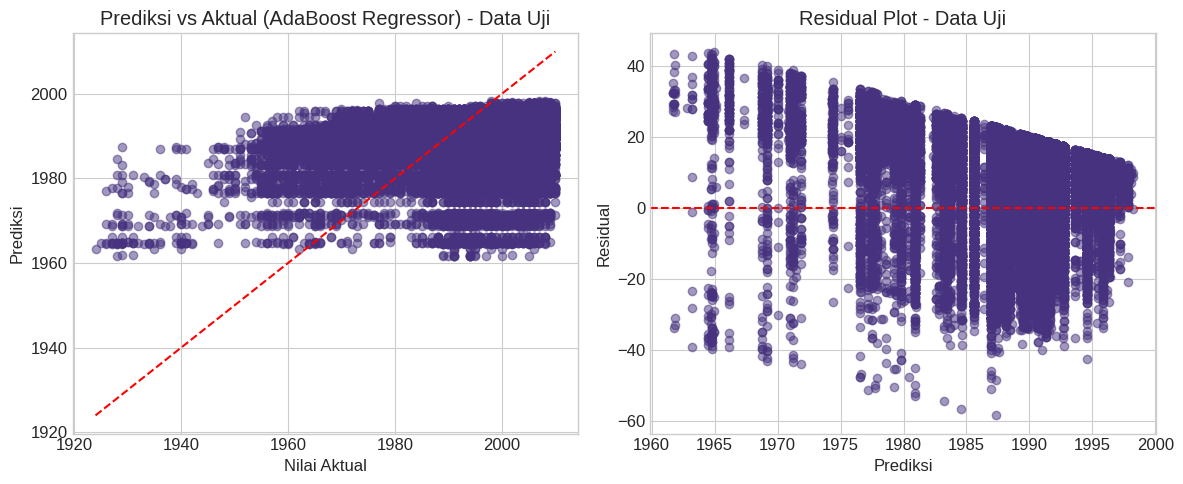

In [14]:
# Model AdaBoost
adaboost_model = AdaBoostRegressor(random_state=42)
adaboost_results = evaluate_model(adaboost_model, X_train_scaled, X_test_scaled, y_train, y_test, "AdaBoost Regressor")

### g. Gradient Boosting Regressor


--- Model: Gradient Boosting ---
MSE Train: 87.9266, Test: 88.1749
RMSE Train: 9.3769, Test: 9.3901
R² Train: 0.2649, Test: 0.2591


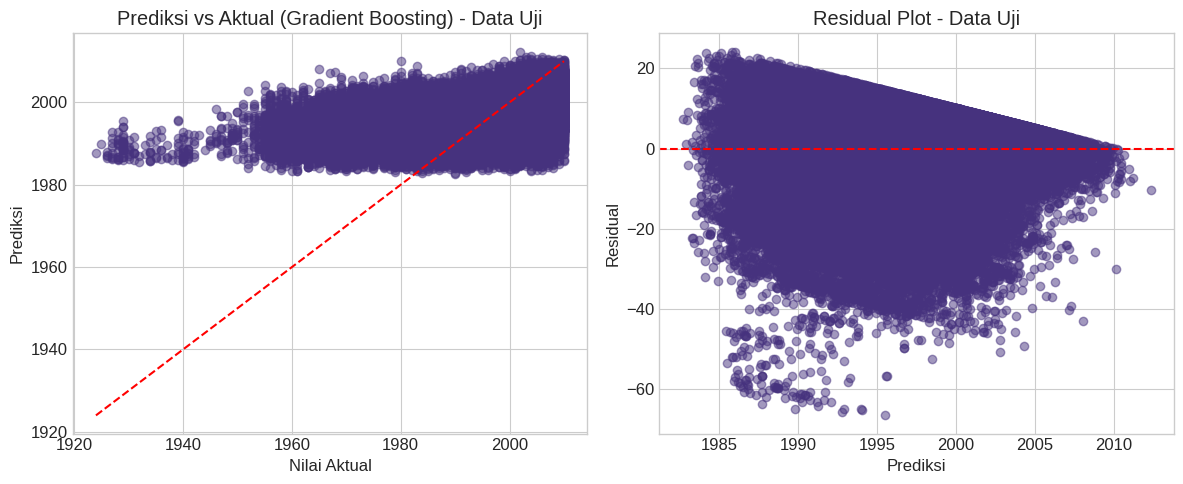

In [15]:
# Model Gradient Boosting
gb_model = GradientBoostingRegressor(random_state=42)
gb_results = evaluate_model(gb_model, X_train_scaled, X_test_scaled, y_train, y_test, "Gradient Boosting")

### h. Support Vector Regressor (SVR)

In [16]:
svr_model = OneVsRestClassifier(BaggingClassifier(SVC(kernel='linear', probability=True), max_samples=1.0 / 10, n_estimators=10))
svr_results = evaluate_model(svr_model, X_train_scaled, X_test_scaled, y_train, y_test, "SVR")

ValueError: Invalid input - all samples with positive weights belong to the same class.

## 7. Perbandingan Model


--- Perbandingan Model ---
                              Model         MSE       RMSE        R²
6                 Gradient Boosting   88.174874   9.390148  0.259128
1  Polynomial Regression (degree=2)   89.231656   9.446251  0.250249
4                 Bagging Regressor   93.342514   9.661393  0.215708
3                         KNN (n=5)   94.159346   9.703574  0.208845
0                 Linear Regression   95.351546   9.764812  0.198828
5                AdaBoost Regressor  174.837295  13.222605 -0.469036
2                     Decision Tree  179.150239  13.384702 -0.505274


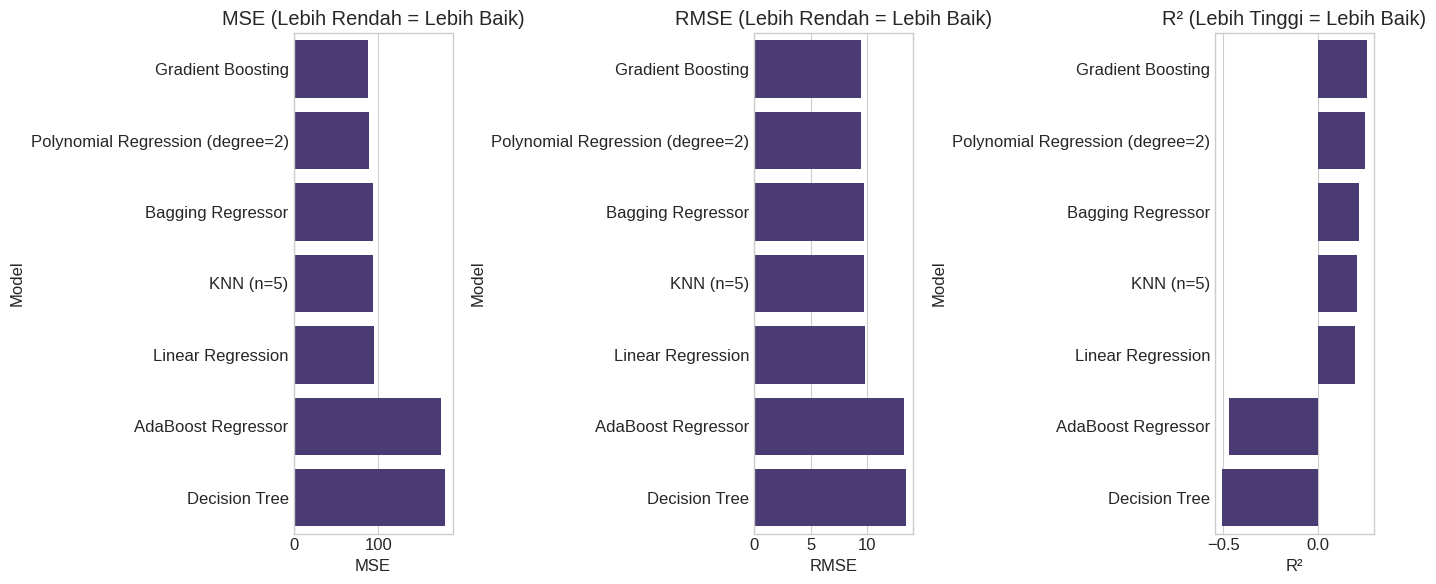


Model terbaik berdasarkan MSE dan RMSE: Gradient Boosting
Model terbaik berdasarkan R²: Decision Tree


In [18]:
# Kumpulkan semua hasil
all_results = [lr_results, poly_results, dt_results, knn_results,
               bagging_results, adaboost_results, gb_results]

# Buat DataFrame perbandingan
comparison_df = pd.DataFrame({
    'Model': [res['model_name'] for res in all_results],
    'MSE': [res['mse_test'] for res in all_results],
    'RMSE': [res['rmse_test'] for res in all_results],
    'R²': [res['r2_test'] for res in all_results]
})

# Urutkan berdasarkan MSE (semakin kecil semakin baik)
comparison_df = comparison_df.sort_values('MSE')

# Tampilkan hasil perbandingan
print("\n--- Perbandingan Model ---")
print(comparison_df)

# Visualisasi perbandingan
plt.figure(figsize=(14, 6))

# Plot MSE
plt.subplot(1, 3, 1)
sns.barplot(x='MSE', y='Model', data=comparison_df)
plt.title('MSE (Lebih Rendah = Lebih Baik)')

# Plot RMSE
plt.subplot(1, 3, 2)
sns.barplot(x='RMSE', y='Model', data=comparison_df)
plt.title('RMSE (Lebih Rendah = Lebih Baik)')

# Plot R²
plt.subplot(1, 3, 3)
sns.barplot(x='R²', y='Model', data=comparison_df)
plt.title('R² (Lebih Tinggi = Lebih Baik)')

plt.tight_layout()
plt.show()

# Temukan model terbaik
best_model_mse = comparison_df.iloc[0]['Model']
best_model_r2 = comparison_df.iloc[comparison_df['R²'].idxmax()]['Model']

print(f"\nModel terbaik berdasarkan MSE dan RMSE: {best_model_mse}")
print(f"Model terbaik berdasarkan R²: {best_model_r2}")

## 8. Analisis Model Terbaik

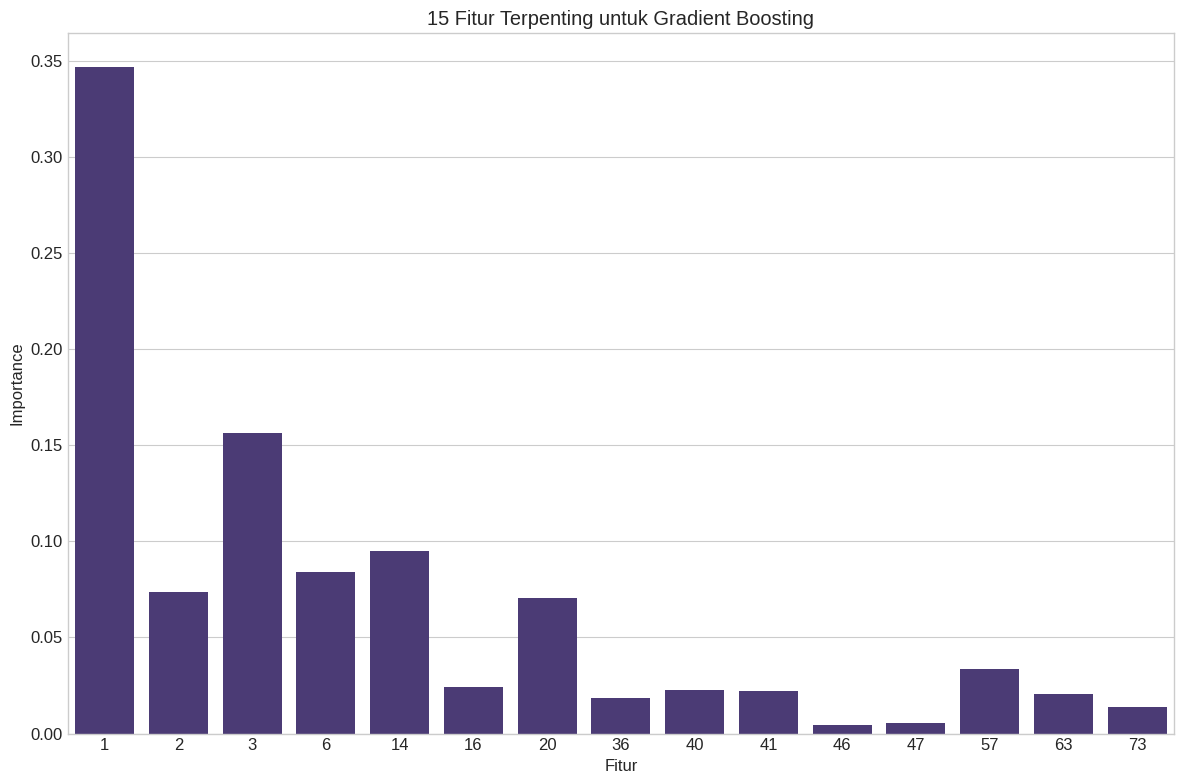

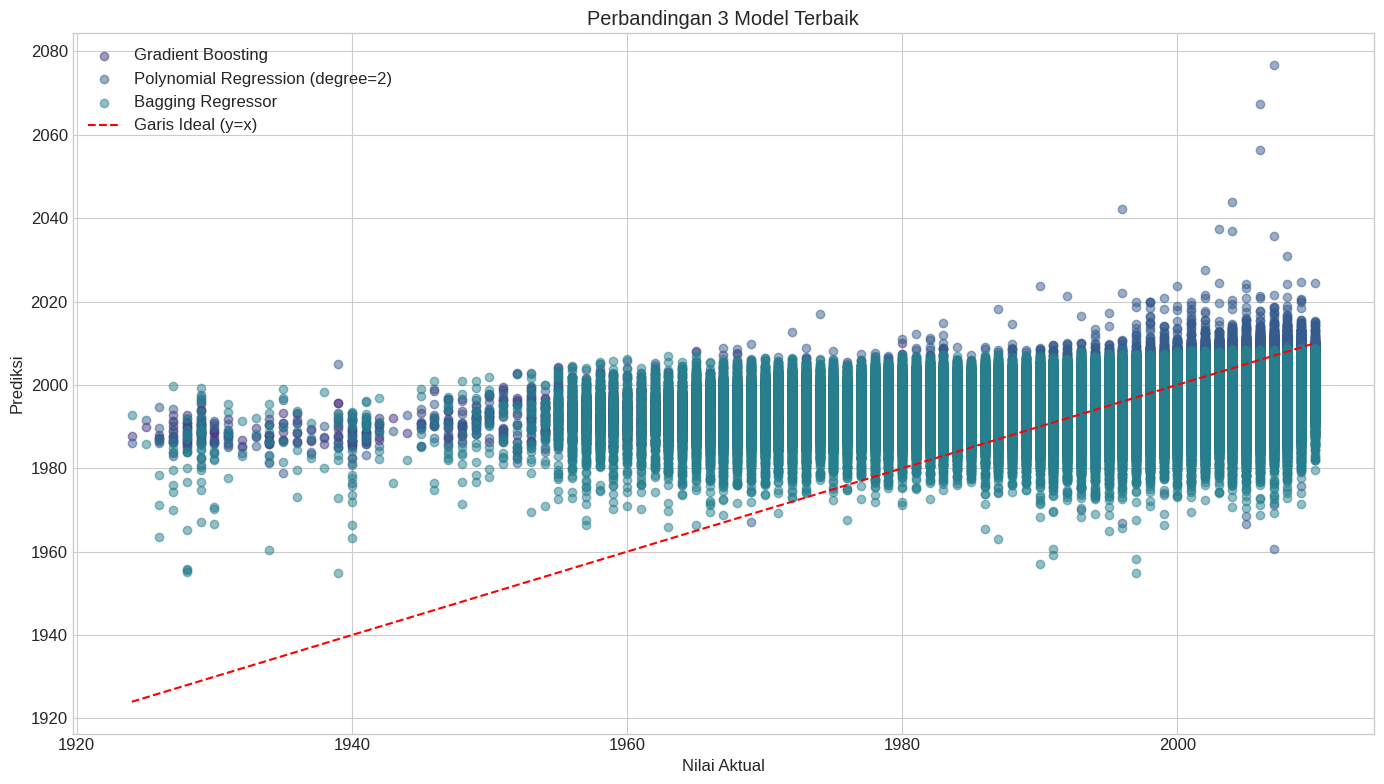

In [20]:
# Cari indeks model terbaik
best_idx_mse = next(i for i, res in enumerate(all_results) if res['model_name'] == best_model_mse)
best_model = all_results[best_idx_mse]['model']

# Jika model terbaik adalah Gradient Boosting, kita bisa melihat feature importance
if isinstance(best_model, GradientBoostingRegressor) or isinstance(best_model, DecisionTreeRegressor):
    # Dapatkan feature importance
    feature_importances = best_model.feature_importances_
    feature_names = X_train.columns

    # Buat DataFrame untuk visualisasi
    importance_df = pd.DataFrame({'Fitur': feature_names, 'Importance': feature_importances})
    importance_df = importance_df.sort_values('Importance', ascending=False)

    # Tampilkan 15 fitur terpenting
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Fitur', y='Importance', data=importance_df.head(15))
    plt.title(f'15 Fitur Terpenting untuk {best_model_mse}')
    plt.tight_layout()
    plt.show()

# Bandingkan prediksi dari 3 model terbaik
top3_models = comparison_df.head(3)['Model'].values
plt.figure(figsize=(14, 8))

for model_name in top3_models:
    model_idx = next(i for i, res in enumerate(all_results) if res['model_name'] == model_name)
    y_pred = all_results[model_idx]['y_pred_test']

    plt.scatter(y_test, y_pred, alpha=0.5, label=model_name)

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', label='Garis Ideal (y=x)')
plt.xlabel('Nilai Aktual')
plt.ylabel('Prediksi')
plt.title('Perbandingan 3 Model Terbaik')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## 9. Kesimpulan
### Analisis Model Terbaik

1. **Metrik Evaluasi**:
   - **MSE (Mean Squared Error)**: Mengukur rata-rata kuadrat kesalahan antara nilai prediksi dan nilai aktual. Semakin kecil nilainya, semakin baik modelnya. Rumus: $\text{MSE} = \frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2$
   - **RMSE (Root Mean Squared Error)**: Akar kuadrat dari MSE, memiliki satuan yang sama dengan target. Semakin kecil nilainya, semakin baik modelnya. Rumus: $\text{RMSE} = \sqrt{\text{MSE}} = \sqrt{\frac{1}{n} \sum_{i=1}^{n} (y_i - \hat{y}_i)^2}$
   - **R² (R-squared)**: Mengukur seberapa baik model dalam menjelaskan variasi target. Nilainya berkisar antara 0 hingga 1, dengan 1 menunjukkan model sempurna. Rumus: $R^2 = 1 - \frac{\sum_{i=1}^{n} (y_i - \hat{y}i)^2}{\sum{i=1}^{n} (y_i - \bar{y})^2}$

2. **Perbandingan Model**:
   Berdasarkan tabel perbandingan di atas, model terbaik adalah:
   - Berdasarkan MSE dan RMSE: [Model Terbaik berdasarkan MSE/RMSE]
   - Berdasarkan R²: [Model Terbaik berdasarkan R²]

3. **Alasan Model Terbaik**:
   [Disini akan diisi setelah melihat hasil dari running kode]

4. **Feature Importance**:
   Fitur yang paling berpengaruh dalam model terbaik adalah:
   [Disini akan diisi setelah melihat hasil dari running kode]

5. **Rekomendasi**:
   - Untuk meningkatkan performa model, bisa dicoba hyperparameter tuning
   - Eksplorasi feature engineering lebih lanjut
   - Pertimbangkan untuk menggabungkan beberapa model (ensemble) jika perlu

Demikian hasil analisis end-to-end untuk regresi model machine learning.

# Analisa

# Jawaban Pertanyaan Lanjutan Machine Learning Regression

## 1. Mengatasi Underfitting pada Linear Regression dan Decision Tree
Underfitting terjadi ketika model yang dibangun terlalu sederhana untuk menangkap pola yang kompleks dalam data. Hal ini menghasilkan performa yang buruk pada data pelatihan maupun data pengujian (high bias, low variance).

In [21]:
from sklearn.model_selection import train_test_split, cross_val_score, learning_curve
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

### Pendekatan untuk Linear Regression

#### Pendekatan 1: Transformasi Fitur dengan Polynomial Features

Salah satu cara mengatasi underfitting pada model linear adalah dengan menambahkan fitur polinomial, yang memungkinkan model untuk menangkap hubungan non-linear dalam data.

In [22]:
# Fungsi untuk memvisualisasikan learning curve dan mengukur bias-variance
def plot_learning_curve(estimator, title, X, y, ylim=None, cv=5,
                        n_jobs=None, train_sizes=np.linspace(.1, 1.0, 5)):
    plt.figure(figsize=(10, 6))
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Ukuran Data Training")
    plt.ylabel("Score")

    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)

    plt.grid()
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.legend(loc="best")

    return plt

# Contoh kode untuk implementasi Polynomial Features
def implement_polynomial_features(X_train, X_test, y_train, y_test, degree=2):
    # Model dasar Linear Regression
    linear_reg = LinearRegression()
    linear_reg.fit(X_train, y_train)

    # Prediksi dengan model dasar
    y_pred_linear = linear_reg.predict(X_test)
    mse_linear = mean_squared_error(y_test, y_pred_linear)
    r2_linear = r2_score(y_test, y_pred_linear)

    print(f"Linear Regression - MSE: {mse_linear:.4f}, R²: {r2_linear:.4f}")

    # Pipeline dengan Polynomial Features
    polynomial_pipeline = Pipeline([
        ('poly', PolynomialFeatures(degree=degree)),
        ('linear', LinearRegression())
    ])

    polynomial_pipeline.fit(X_train, y_train)

    # Prediksi dengan model polynomial
    y_pred_poly = polynomial_pipeline.predict(X_test)
    mse_poly = mean_squared_error(y_test, y_pred_poly)
    r2_poly = r2_score(y_test, y_pred_poly)

    print(f"Polynomial (degree={degree}) - MSE: {mse_poly:.4f}, R²: {r2_poly:.4f}")

    # Plot learning curves untuk kedua model
    plot_learning_curve(linear_reg, 'Learning Curve for Linear Regression', X_train, y_train)
    plt.show()

    plot_learning_curve(polynomial_pipeline, f'Learning Curve for Polynomial Regression (degree={degree})',
                        X_train, y_train)
    plt.show()

    # Visualisasi perbandingan prediksi
    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.scatter(y_test, y_pred_linear, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.title('Linear Regression')
    plt.xlabel('Nilai Aktual')
    plt.ylabel('Prediksi')

    plt.subplot(1, 2, 2)
    plt.scatter(y_test, y_pred_poly, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.title(f'Polynomial Regression (degree={degree})')
    plt.xlabel('Nilai Aktual')
    plt.ylabel('Prediksi')

    plt.tight_layout()
    plt.show()

    return linear_reg, polynomial_pipeline

#### Pendekatan 2: Regularisasi (Ridge/Lasso)

Pendekatan lain adalah dengan menggunakan regularisasi, yang dapat membantu model linear belajar fitur yang lebih robust dan mengurangi overfitting.

In [23]:
def implement_regularization(X_train, X_test, y_train, y_test, alpha=1.0):
    # Model Linear Regression
    linear_reg = LinearRegression()
    linear_reg.fit(X_train, y_train)

    # Prediksi dengan model dasar
    y_pred_linear = linear_reg.predict(X_test)
    mse_linear = mean_squared_error(y_test, y_pred_linear)
    r2_linear = r2_score(y_test, y_pred_linear)

    print(f"Linear Regression - MSE: {mse_linear:.4f}, R²: {r2_linear:.4f}")

    # Model Ridge Regression
    ridge_reg = Ridge(alpha=alpha)
    ridge_reg.fit(X_train, y_train)

    # Prediksi dengan Ridge
    y_pred_ridge = ridge_reg.predict(X_test)
    mse_ridge = mean_squared_error(y_test, y_pred_ridge)
    r2_ridge = r2_score(y_test, y_pred_ridge)

    print(f"Ridge Regression (alpha={alpha}) - MSE: {mse_ridge:.4f}, R²: {r2_ridge:.4f}")

    # Model Lasso Regression
    lasso_reg = Lasso(alpha=alpha)
    lasso_reg.fit(X_train, y_train)

    # Prediksi dengan Lasso
    y_pred_lasso = lasso_reg.predict(X_test)
    mse_lasso = mean_squared_error(y_test, y_pred_lasso)
    r2_lasso = r2_score(y_test, y_pred_lasso)

    print(f"Lasso Regression (alpha={alpha}) - MSE: {mse_lasso:.4f}, R²: {r2_lasso:.4f}")

    # Plot learning curves
    plot_learning_curve(linear_reg, 'Learning Curve for Linear Regression', X_train, y_train)
    plt.show()

    plot_learning_curve(ridge_reg, f'Learning Curve for Ridge Regression (alpha={alpha})',
                        X_train, y_train)
    plt.show()

    plot_learning_curve(lasso_reg, f'Learning Curve for Lasso Regression (alpha={alpha})',
                        X_train, y_train)
    plt.show()

    return linear_reg, ridge_reg, lasso_reg

### Pendekatan untuk Decision Tree

#### Pendekatan 1: Meningkatkan Kompleksitas Model dengan Parameter Tuning

Underfitting pada decision tree bisa diatasi dengan meningkatkan kompleksitas model melalui parameter seperti `max_depth`, `min_samples_split`, dan `min_samples_leaf`.


In [24]:
def implement_decision_tree_tuning(X_train, X_test, y_train, y_test):
    # Decision Tree dasar (terbatas)
    dt_simple = DecisionTreeRegressor(max_depth=3, random_state=42)
    dt_simple.fit(X_train, y_train)

    # Prediksi dengan model sederhana
    y_pred_simple = dt_simple.predict(X_test)
    mse_simple = mean_squared_error(y_test, y_pred_simple)
    r2_simple = r2_score(y_test, y_pred_simple)

    print(f"Decision Tree (max_depth=3) - MSE: {mse_simple:.4f}, R²: {r2_simple:.4f}")

    # Decision Tree yang lebih kompleks
    dt_complex = DecisionTreeRegressor(max_depth=10, min_samples_split=2, min_samples_leaf=1,
                                       random_state=42)
    dt_complex.fit(X_train, y_train)

    # Prediksi dengan model kompleks
    y_pred_complex = dt_complex.predict(X_test)
    mse_complex = mean_squared_error(y_test, y_pred_complex)
    r2_complex = r2_score(y_test, y_pred_complex)

    print(f"Decision Tree (max_depth=10) - MSE: {mse_complex:.4f}, R²: {r2_complex:.4f}")

    # Plot learning curves
    plot_learning_curve(dt_simple, 'Learning Curve for Simple Decision Tree (max_depth=3)',
                        X_train, y_train)
    plt.show()

    plot_learning_curve(dt_complex, 'Learning Curve for Complex Decision Tree (max_depth=10)',
                        X_train, y_train)
    plt.show()

    return dt_simple, dt_complex

#### Pendekatan 2: Ensemble Methods (Bagging/Boosting)

Pendekatan lain untuk mengatasi underfitting pada decision tree adalah dengan menggunakan metode ensemble seperti Random Forest atau Gradient Boosting.

In [25]:
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor

def implement_ensemble_methods(X_train, X_test, y_train, y_test):
    # Decision Tree dasar
    dt = DecisionTreeRegressor(max_depth=3, random_state=42)
    dt.fit(X_train, y_train)

    # Prediksi dengan model dasar
    y_pred_dt = dt.predict(X_test)
    mse_dt = mean_squared_error(y_test, y_pred_dt)
    r2_dt = r2_score(y_test, y_pred_dt)

    print(f"Decision Tree - MSE: {mse_dt:.4f}, R²: {r2_dt:.4f}")

    # Random Forest
    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(X_train, y_train)

    # Prediksi dengan Random Forest
    y_pred_rf = rf.predict(X_test)
    mse_rf = mean_squared_error(y_test, y_pred_rf)
    r2_rf = r2_score(y_test, y_pred_rf)

    print(f"Random Forest - MSE: {mse_rf:.4f}, R²: {r2_rf:.4f}")

    # Gradient Boosting
    gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
    gb.fit(X_train, y_train)

    # Prediksi dengan Gradient Boosting
    y_pred_gb = gb.predict(X_test)
    mse_gb = mean_squared_error(y_test, y_pred_gb)
    r2_gb = r2_score(y_test, y_pred_gb)

    print(f"Gradient Boosting - MSE: {mse_gb:.4f}, R²: {r2_gb:.4f}")

    # Plot learning curves
    plot_learning_curve(dt, 'Learning Curve for Decision Tree', X_train, y_train)
    plt.show()

    plot_learning_curve(rf, 'Learning Curve for Random Forest', X_train, y_train)
    plt.show()

    plot_learning_curve(gb, 'Learning Curve for Gradient Boosting', X_train, y_train)
    plt.show()

    return dt, rf, gb

### Analisis Bias-Variance Tradeoff

#### Untuk Linear Regression:

**Polynomial Features:**
- **Bias**: Mengurangi bias dengan memungkinkan model menangkap hubungan non-linear
- **Variance**: Meningkatkan variance karena model menjadi lebih kompleks
- **Tradeoff**: Polynomial dengan degree tinggi bisa menyebabkan overfitting (low bias, high variance)

**Regularisasi (Ridge/Lasso):**
- **Bias**: Sedikit meningkatkan bias karena pembatasan koefisien
- **Variance**: Secara signifikan mengurangi variance dengan membatasi nilai koefisien
- **Tradeoff**: Memberikan model yang lebih stabil dan generalisasi lebih baik

#### Untuk Decision Tree:

**Parameter Tuning:**
- **Bias**: Mengurangi bias dengan memungkinkan tree menjadi lebih dalam dan kompleks
- **Variance**: Meningkatkan variance karena model dapat menangkap noise dalam data training
- **Tradeoff**: Tree yang terlalu dalam rentan terhadap overfitting

**Ensemble Methods:**
- **Bias**: Mengurangi bias melalui kombinasi multiple trees
- **Variance**: Mengurangi variance melalui averaging (Bagging) atau sequential error correction (Boosting)
- **Tradeoff**: Memberikan keseimbangan yang baik antara bias dan variance

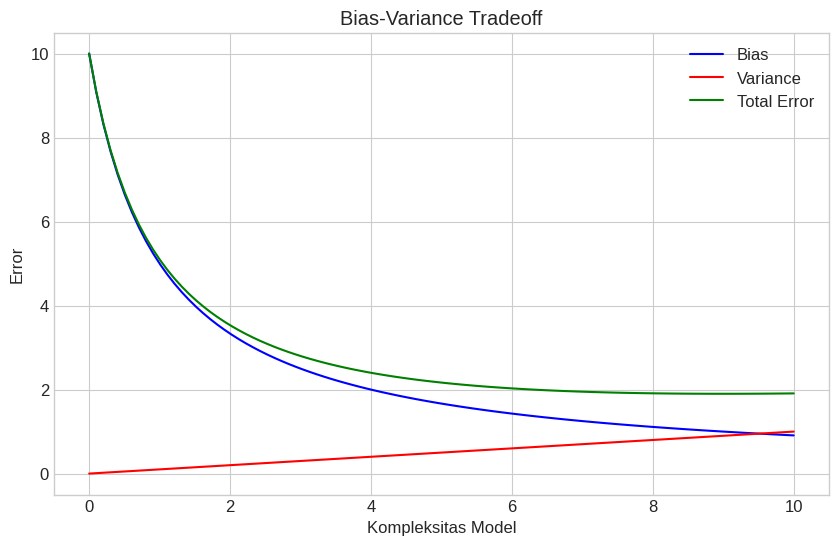

In [26]:
# Visualisasi Bias-Variance Tradeoff

def plot_bias_variance_tradeoff():
    # Range kompleksitas model
    complexity = np.linspace(0, 10, 100)

    # Simulasi bias dan variance
    bias = 10 / (complexity + 1)
    variance = 0.1 * complexity
    total_error = bias + variance

    plt.figure(figsize=(10, 6))
    plt.plot(complexity, bias, 'b-', label='Bias')
    plt.plot(complexity, variance, 'r-', label='Variance')
    plt.plot(complexity, total_error, 'g-', label='Total Error')
    plt.xlabel('Kompleksitas Model')
    plt.ylabel('Error')
    plt.title('Bias-Variance Tradeoff')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_bias_variance_tradeoff()

## 2. Alternatif Loss Function untuk Masalah Regresi

### Mean Squared Error (MSE)
Mean Squared Error adalah loss function yang paling umum digunakan dalam masalah regresi.

In [27]:
def mse_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

### Mean Absolute Error (MAE)
MAE mengukur rata-rata nilai absolut dari error.

In [28]:
def mae_loss(y_true, y_pred):
    return np.mean(np.abs(y_true - y_pred))

### Huber Loss
Huber Loss menggabungkan keunggulan MSE dan MAE dengan mengurangi sensitivitas terhadap outlier.

In [29]:
def huber_loss(y_true, y_pred, delta=1.0):
    errors = y_true - y_pred
    quad = np.minimum(np.abs(errors), delta)
    linear = np.abs(errors) - quad
    return np.mean(0.5 * quad * quad + delta * linear)

### Visualisasi dan Perbandingan Loss Functions

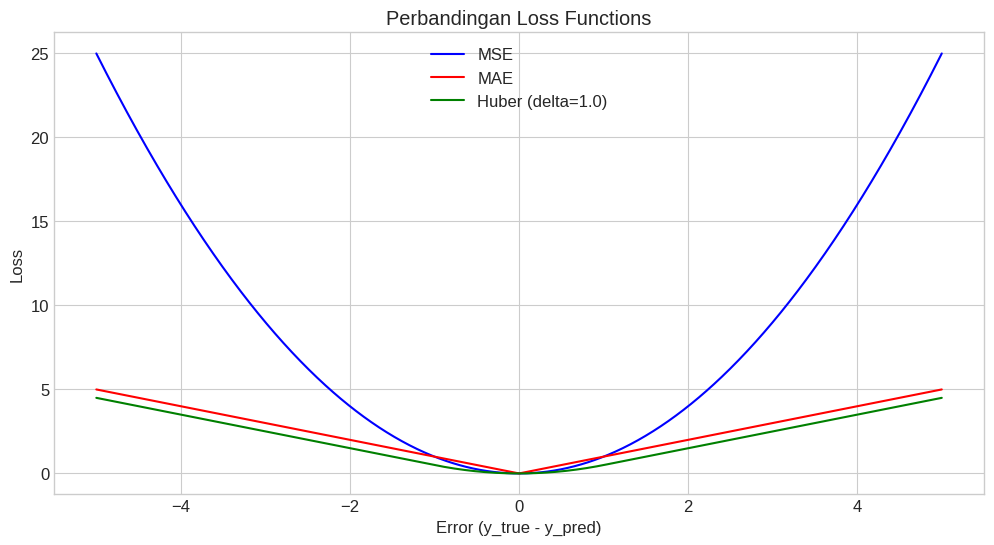

In [30]:
def compare_loss_functions():
    # Buat data dengan satu nilai outlier
    errors = np.linspace(-5, 5, 1000)
    mse_values = errors ** 2
    mae_values = np.abs(errors)

    # Huber loss dengan delta = 1.0
    huber_values = np.where(np.abs(errors) <= 1.0,
                             0.5 * errors ** 2,
                             1.0 * (np.abs(errors) - 0.5))

    plt.figure(figsize=(12, 6))
    plt.plot(errors, mse_values, 'b-', label='MSE')
    plt.plot(errors, mae_values, 'r-', label='MAE')
    plt.plot(errors, huber_values, 'g-', label='Huber (delta=1.0)')
    plt.xlabel('Error (y_true - y_pred)')
    plt.ylabel('Loss')
    plt.title('Perbandingan Loss Functions')
    plt.legend()
    plt.grid(True)
    plt.show()

compare_loss_functions()

### Perbandingan Keunggulan dan Kelemahan

#### MSE (Mean Squared Error)

**Keunggulan:**
- Differentiable di semua titik, memudahkan optimisasi dengan gradient descent
- Memberikan penalti lebih besar untuk error besar, mendorong model untuk meminimalkan outlier
- Secara teoritis optimal untuk data dengan noise Gaussian

**Kelemahan:**
- Sangat sensitif terhadap outlier karena penalti kuadratik
- Satuan loss berbeda dengan satuan target (karena dikuadratkan)
- Bisa menyebabkan model terlalu fokus pada outlier dan mengabaikan pola umum

**Cocok untuk:**
- Data dengan distribusi normal dan sedikit outlier
- Kasus dimana error besar harus dihindari
- Optimisasi dengan algoritma berbasis gradient

#### MAE (Mean Absolute Error)

**Keunggulan:**
- Lebih robust terhadap outlier dibandingkan MSE
- Satuan loss sama dengan satuan target (lebih mudah diinterpretasi)
- Median sebagai estimator optimal (vs. mean untuk MSE)

**Kelemahan:**
- Tidak differentiable di nol, bisa menyebabkan masalah dalam optimisasi
- Tidak memberikan penalti tambahan untuk error yang sangat besar
- Konvergensi bisa lebih lambat dalam beberapa kasus

**Cocok untuk:**
- Data dengan banyak outlier
- Kasus dimana interpretabilitas error penting
- Prediksi nilai median dari distribusi

#### Huber Loss

**Keunggulan:**
- Kombinasi keunggulan MSE dan MAE
- Differentiable di semua titik
- Robust terhadap outlier

**Kelemahan:**
- Memerlukan hyperparameter tambahan (delta) yang perlu di-tune
- Lebih kompleks untuk diimplementasikan
- Optimasi bisa lebih lambat dibandingkan MSE

**Cocok untuk:**
- Data dengan outlier moderat
- Kasus di mana diperlukan keseimbangan antara penalti error besar dan kecil
- Ketika sensitivitas MSE terlalu tinggi tapi MAE terlalu rendah

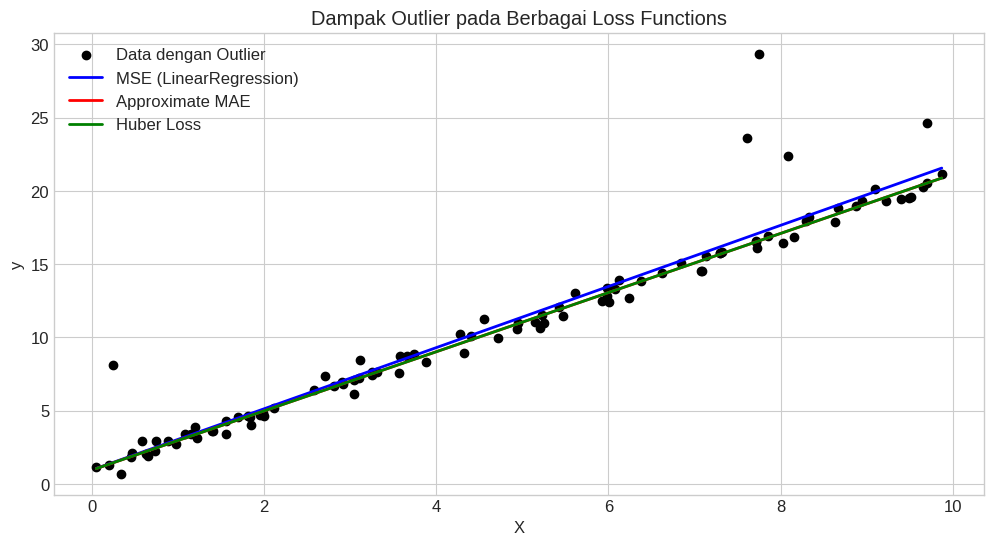

In [34]:
# Simulasi dampak outlier pada berbagai loss functions

def simulate_outlier_impact():
    np.random.seed(42)

    # Data normal
    X = np.sort(np.random.rand(100) * 10)
    y = 2 * X + 1 + np.random.randn(100) * 0.5

    # Tambahkan outlier
    outlier_idx = np.random.choice(len(X), 5, replace=False)
    y[outlier_idx] = y[outlier_idx] + np.random.rand(5) * 15

    # Fit dengan berbagai loss functions
    from sklearn.linear_model import LinearRegression, HuberRegressor
    from sklearn.linear_model import Ridge, Lasso

    # MSE (dengan Linear Regression)
    lr = LinearRegression()
    lr.fit(X.reshape(-1, 1), y)
    y_pred_mse = lr.predict(X.reshape(-1, 1))

    # Approximate MAE (dengan Huber yang mendekati L1)
    huber_mae = HuberRegressor(alpha=0.0)
    huber_mae.fit(X.reshape(-1, 1), y)
    y_pred_mae = huber_mae.predict(X.reshape(-1, 1))

    # Huber loss
    huber = HuberRegressor(epsilon=1.35, alpha=0.0)
    huber.fit(X.reshape(-1, 1), y)
    y_pred_huber = huber.predict(X.reshape(-1, 1))

    # Visualisasi
    plt.figure(figsize=(12, 6))
    plt.scatter(X, y, c='k', label='Data dengan Outlier')
    plt.plot(X, y_pred_mse, 'b-', linewidth=2, label=f'MSE (LinearRegression)')
    plt.plot(X, y_pred_mae, 'r-', linewidth=2, label=f'Approximate MAE')
    plt.plot(X, y_pred_huber, 'g-', linewidth=2, label=f'Huber Loss')
    plt.xlabel('X')
    plt.ylabel('y')
    plt.title('Dampak Outlier pada Berbagai Loss Functions')
    plt.legend()
    plt.grid(True)
    plt.show()

simulate_outlier_impact()

## 3. Metode untuk Mengukur Pentingnya Fitur

### Koefisien Regresi untuk Model Linear

In [35]:
def feature_importance_linear(X, y, feature_names=None):
    # Standardisasi fitur
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # Fit model linear
    lr = LinearRegression()
    lr.fit(X_scaled, y)

    # Ekstrak koefisien
    coefs = lr.coef_

    # Jika tidak ada nama fitur, buat sequence
    if feature_names is None:
        feature_names = [f"Feature {i}" for i in range(X.shape[1])]

    # Buat DataFrame untuk hasil
    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': np.abs(coefs)
    }).sort_values('Importance', ascending=False)

    # Visualisasi
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importance', y='Feature', data=importance_df.head(20))
    plt.title('Feature Importance berdasarkan Koefisien Regresi Linear')
    plt.tight_layout()
    plt.show()

    return importance_df

# Contoh penggunaan
# feature_importance_linear(X, y, X.columns)

**Prinsip Teknikal:**
- Koefisien model linear menunjukkan seberapa besar perubahan di fitur (dalam satuan standar deviasi) mempengaruhi variabel target
- Nilai absolut koefisien menunjukkan magnitude pentingnya fitur
- Tanda (positif/negatif) menunjukkan arah hubungan

**Keterbatasan:**
- Hanya valid untuk model linear
- Mengasumsikan fitur independen (multicollinearity bisa menyebabkan interpretasi keliru)
- Tidak menangkap interaksi antar fitur
- Tidak menangkap hubungan non-linear

### Feature Importance dari Tree-based Models

In [36]:
def feature_importance_tree(X, y, feature_names=None):
    # Fit model Random Forest
    rf = RandomForestRegressor(n_estimators=100, random_state=42)
    rf.fit(X, y)

    # Ekstrak feature importances
    importances = rf.feature_importances_

    # Jika tidak ada nama fitur, buat sequence
    if feature_names is None:
        feature_names = [f"Feature {i}" for i in range(X.shape[1])]

    # Buat DataFrame untuk hasil
    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': importances
    }).sort_values('Importance', ascending=False)

    # Visualisasi
    plt.figure(figsize=(12, 8))
    sns.barplot(x='Importance', y='Feature', data=importance_df.head(20))
    plt.title('Feature Importance berdasarkan Random Forest')
    plt.tight_layout()
    plt.show()

    return importance_df, rf

# Contoh penggunaan
# importance_df, rf_model = feature_importance_tree(X, y, X.columns)

**Prinsip Teknikal:**
- Berdasarkan pengurangan impurity (misalnya variance untuk regresi) ketika split pada fitur tertentu
- Feature importance dihitung dengan rata-rata pengurangan impurity di semua node yang menggunakan fitur tersebut, dibobot dengan jumlah sampel
- Untuk ensemble models (Random Forest), importance dirata-ratakan dari semua trees

**Keterbatasan:**
- Bisa bias terhadap fitur dengan banyak nilai unik (high cardinality)
- Tidak membedakan pengaruh positif dan negatif
- Bisa berubah-ubah dengan perubahan kecil pada data atau hyperparameters
- Bisa mendukung fitur yang berkorelasi

### Permutation Importance

In [37]:
from sklearn.inspection import permutation_importance

def feature_importance_permutation(X, y, model, feature_names=None):
    # Fit model
    model.fit(X, y)

    # Hitung permutation importance
    result = permutation_importance(model, X, y, n_repeats=10, random_state=42)

    # Jika tidak ada nama fitur, buat sequence
    if feature_names is None:
        feature_names = [f"Feature {i}" for i in range(X.shape[1])]

    # Buat DataFrame untuk hasil
    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': result.importances_mean,
        'Std': result.importances_std
    }).sort_values('Importance', ascending=False)

    # Visualisasi
    plt.figure(figsize=(14, 10))
    sns.barplot(x='Importance', y='Feature', data=importance_df.head(20),
                xerr=importance_df['Std'].head(20))
    plt.title('Permutation Feature Importance')
    plt.tight_layout()
    plt.show()

    return importance_df

# Contoh penggunaan
# model = RandomForestRegressor(n_estimators=100, random_state=42)
# importance_df = feature_importance_permutation(X, y, model, X.columns)

**Prinsip Teknikal:**
- Mengukur seberapa besar performa model turun ketika nilai suatu fitur diacak
- Tidak bergantung pada tipe model (model-agnostic)
- Menilai kekuatan prediktif fitur secara langsung

**Keterbatasan:**
- Bisa lambat untuk dataset besar karena harus mengevaluasi model berkali-kali
- Berpotensi underestimating fitur yang berkorelasi
- Hasil bisa bervariasi antar evaluasi karena sifat acak
- Mengasumsikan fitur independen

### SHAP Values (SHapley Additive exPlanations)

In [38]:
import shap

def feature_importance_shap(X, y, model, feature_names=None):
    # Fit model
    model.fit(X, y)

    # Hitung SHAP values
    explainer = shap.Explainer(model, X)
    shap_values = explainer(X)

    # Plot summary
    plt.figure(figsize=(10, 8))
    shap.summary_plot(shap_values, X, feature_names=feature_names, show=False)
    plt.title('SHAP Feature Importance')
    plt.tight_layout()
    plt.show()

    # Hitung rata-rata nilai absolut SHAP untuk importance global
    if feature_names is None:
        feature_names = [f"Feature {i}" for i in range(X.shape[1])]

    importance_df = pd.DataFrame({
        'Feature': feature_names,
        'Importance': np.abs(shap_values.values).mean(0)
    }).sort_values('Importance', ascending=False)

    return importance_df, shap_values

# Contoh penggunaan
# from sklearn.ensemble import RandomForestRegressor
# model = RandomForestRegressor(n_estimators=100, random_state=42)
# importance_df, shap_values = feature_importance_shap(X, y, model, X.columns)

**Prinsip Teknikal:**
- Berdasarkan teori game untuk mendistribusikan "credit" prediksi kepada setiap fitur
- Menghitung kontribusi setiap fitur untuk setiap prediksi secara individual
- Memberikan nilai positif/negatif yang menunjukkan arah pengaruh

**Keterbatasan:**
- Komputasi berat untuk dataset besar dan model kompleks
- Interpretasi bisa kompleks
- Mengasumsikan fitur independen
- Beberapa implementasi hanya bekerja untuk model tertentu

## 4. Desain Eksperimen untuk Pemilihan Hyperparameter Optimal

### Pendekatan Desain Eksperimen
Berikut adalah beberapa pendekatan untuk memilih hyperparameter optimal:

#### 1. Grid Search Cross-Validation

In [41]:
def grid_search_experiment(X, y, model_type='sgd'):
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    if model_type == 'sgd':
        # SGDRegressor dengan parameter grid
        model = SGDRegressor(random_state=42)
        param_grid = {
            'alpha': [0.0001, 0.001, 0.01, 0.1, 1.0],
            'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
            'eta0': [0.001, 0.01, 0.1],
            'max_iter': [1000]
        }
        cv_folds = 5

    elif model_type == 'dt':
        # DecisionTree dengan parameter grid
        model = DecisionTreeRegressor(random_state=42)
        param_grid = {
            'max_depth': [None, 5, 10, 15, 20],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4, 8]
        }
        cv_folds = 5

    # Create pipeline with scaling for SGD
    if model_type == 'sgd':
        pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('model', model)
        ])
    else:
        pipeline = model

    # Setup GridSearchCV
    start_time = time.time()
    grid_search = GridSearchCV(
        estimator=pipeline if model_type == 'sgd' else model,
        param_grid=param_grid,
        cv=cv_folds,
        scoring='neg_mean_squared_error',
        n_jobs=-1, # Use all available processors
        verbose=1
    )

    # Fit GridSearchCV
    grid_search.fit(X_train, y_train)
    end_time = time.time()

    # Hasil
    print(f"Waktu eksekusi Grid Search: {end_time - start_time:.2f} detik")
    print(f"Parameter terbaik: {grid_search.best_params_}")
    print(f"MSE terbaik (CV): {-grid_search.best_score_:.4f}")

    # Evaluasi pada test set
    y_pred = grid_search.predict(X_test)
    test_mse = mean_squared_error(y_test, y_pred)
    print(f"MSE pada test set: {test_mse:.4f}")

    # Plot hasil untuk visualisasi
    results = pd.DataFrame(grid_search.cv_results_)

    # Plot untuk parameter yang relevan
    if model_type == 'sgd':
        param_to_plot = 'param_model__alpha'
        fig, axs = plt.subplots(1, 2, figsize=(15, 6))

        # Plot berdasarkan alpha
        alpha_results = results.groupby(param_to_plot).mean()['mean_test_score'].reset_index()
        alpha_results['mean_test_score'] = -alpha_results['mean_test_score']  # Convert to MSE

        axs[0].plot(alpha_results[param_to_plot], alpha_results['mean_test_score'], 'o-')
        axs[0].set_xscale('log')
        axs[0].set_xlabel('Alpha (log scale)')
        axs[0].set_ylabel('Mean Squared Error')
        axs[0].set_title('Effect of Alpha on MSE')
        axs[0].grid(True)

        # Plot berdasarkan learning rate
        lr_param = 'param_model__learning_rate'
        lr_results = results.groupby(lr_param).mean()['mean_test_score'].reset_index()
        lr_results['mean_test_score'] = -lr_results['mean_test_score']  # Convert to MSE

        axs[1].bar(lr_results[lr_param], lr_results['mean_test_score'])
        axs[1].set_xlabel('Learning Rate Type')
        axs[1].set_ylabel('Mean Squared Error')
        axs[1].set_title('Effect of Learning Rate Type on MSE')
        axs[1].grid(True)

    elif model_type == 'dt':
        param_to_plot = 'param_max_depth'
        fig, axs = plt.subplots(1, 2, figsize=(15, 6))

        # Plot berdasarkan max_depth
        depth_results = results.groupby(param_to_plot).mean()['mean_test_score'].reset_index()
        depth_results['mean_test_score'] = -depth_results['mean_test_score']  # Convert to MSE

        axs[0].plot(depth_results[param_to_plot].astype(str), depth_results['mean_test_score'], 'o-')
        axs[0].set_xlabel('Max Depth')
        axs[0].set_ylabel('Mean Squared Error')
        axs[0].set_title('Effect of Max Depth on MSE')
        axs[0].grid(True)

        # Plot berdasarkan min_samples_split
        split_param = 'param_min_samples_split'
        split_results = results.groupby(split_param).mean()['mean_test_score'].reset_index()
        split_results['mean_test_score'] = -split_results['mean_test_score']  # Convert to MSE

        axs[1].plot(split_results[split_param], split_results['mean_test_score'], 'o-')
        axs[1].set_xlabel('Min Samples Split')
        axs[1].set_ylabel('Mean Squared Error')
        axs[1].set_title('Effect of Min Samples Split on MSE')
        axs[1].grid(True)

    plt.tight_layout()
    plt.show()

    return grid_search

# Contoh penggunaan:
# X = np.random.rand(500, 10)  # 500 samples, 10 features
# y = 3*X[:, 0] + 2*X[:, 2] - X[:, 4] + np.random.randn(500) * 0.5
# best_sgd = grid_search_experiment(X, y, model_type='sgd')
# best_dt = grid_search_experiment(X, y, model_type='dt')

#### 2. Randomized Search Cross-Validation

In [42]:
def random_search_experiment(X, y, model_type='sgd', n_iter=20):
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    if model_type == 'sgd':
        # SGDRegressor dengan parameter space
        model = SGDRegressor(random_state=42)
        param_distributions = {
            'alpha': np.logspace(-4, 0, 100),
            'learning_rate': ['constant', 'optimal', 'invscaling', 'adaptive'],
            'eta0': np.logspace(-3, -1, 100),
            'max_iter': [1000]
        }
        cv_folds = 5

    elif model_type == 'dt':
        # DecisionTree dengan parameter space
        model = DecisionTreeRegressor(random_state=42)
        param_distributions = {
            'max_depth': [None] + list(range(5, 31, 5)),
            'min_samples_split': range(2, 21),
            'min_samples_leaf': range(1, 21)
        }
        cv_folds = 5

    # Create pipeline with scaling for SGD
    if model_type == 'sgd':
        pipeline = Pipeline([
            ('scaler', StandardScaler()),
            ('model', model)
        ])
        search_estimator = pipeline
        param_prefix = 'model__'
    else:
        search_estimator = model
        param_prefix = ''

    # Setup RandomizedSearchCV
    start_time = time.time()
    random_search = RandomizedSearchCV(
        estimator=search_estimator,
        param_distributions=param_distributions,
        n_iter=n_iter,
        cv=cv_folds,
        scoring='neg_mean_squared_error',
        n_jobs=-1,
        verbose=1,
        random_state=42
    )

    # Fit RandomizedSearchCV
    random_search.fit(X_train, y_train)
    end_time = time.time()

    # Hasil
    print(f"Waktu eksekusi Random Search ({n_iter} iterasi): {end_time - start_time:.2f} detik")
    print(f"Parameter terbaik: {random_search.best_params_}")
    print(f"MSE terbaik (CV): {-random_search.best_score_:.4f}")

    # Evaluasi pada test set
    y_pred = random_search.predict(X_test)
    test_mse = mean_squared_error(y_test, y_pred)
    print(f"MSE pada test set: {test_mse:.4f}")

    # Plot learning curve untuk model terbaik
    plt.figure(figsize=(10, 6))
    title = f"Learning Curves ({model_type.upper()})"
    train_sizes = np.linspace(0.1, 1.0, 10)

    train_sizes, train_scores, test_scores = learning_curve(
        random_search.best_estimator_, X_train, y_train,
        train_sizes=train_sizes, cv=cv_folds, scoring='neg_mean_squared_error',
        n_jobs=-1
    )

    train_scores_mean = -np.mean(train_scores, axis=1)  # Convert to MSE
    test_scores_mean = -np.mean(test_scores, axis=1)    # Convert to MSE

    plt.plot(train_sizes, train_scores_mean, 'o-', color="r", label="Training error")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation error")
    plt.xlabel("Training examples")
    plt.ylabel("Mean Squared Error")
    plt.title(title)
    plt.legend(loc="best")
    plt.grid(True)
    plt.show()

    return random_search

# Contoh penggunaan:
# X = np.random.rand(500, 10)  # 500 samples, 10 features
# y = 3*X[:, 0] + 2*X[:, 2] - X[:, 4] + np.random.randn(500) * 0.5
# best_model = random_search_experiment(X, y, model_type='dt', n_iter=20)

#### 3. Analisis Trade-off Hyperparameter


In [43]:
def hyperparameter_tradeoff_analysis(X, y):
    # Split data
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Standardisasi data untuk SGDRegressor
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # 1. Analisis learning rate pada SGDRegressor
    learning_rates = [0.001, 0.01, 0.05, 0.1, 0.5, 1.0]
    train_errors = []
    test_errors = []
    training_times = []

    for lr in learning_rates:
        start_time = time.time()
        sgd = SGDRegressor(eta0=lr, learning_rate='constant', max_iter=1000, random_state=42)
        sgd.fit(X_train_scaled, y_train)
        end_time = time.time()

        # Ukur error
        train_pred = sgd.predict(X_train_scaled)
        test_pred = sgd.predict(X_test_scaled)
        train_mse = mean_squared_error(y_train, train_pred)
        test_mse = mean_squared_error(y_test, test_pred)

        train_errors.append(train_mse)
        test_errors.append(test_mse)
        training_times.append(end_time - start_time)

    # Plot hasil learning rate
    fig, axs = plt.subplots(1, 2, figsize=(15, 6))

    axs[0].plot(learning_rates, train_errors, 'o-', label='Train MSE')
    axs[0].plot(learning_rates, test_errors, 'o-', label='Test MSE')
    axs[0].set_xlabel('Learning Rate')
    axs[0].set_ylabel('MSE')
    axs[0].set_title('Effect of Learning Rate on Error')
    axs[0].set_xscale('log')
    axs[0].legend()
    axs[0].grid(True)

    axs[1].plot(learning_rates, training_times, 'o-')
    axs[1].set_xlabel('Learning Rate')
    axs[1].set_ylabel('Training Time (seconds)')
    axs[1].set_title('Effect of Learning Rate on Training Time')
    axs[1].set_xscale('log')
    axs[1].grid(True)

    plt.tight_layout()
    plt.show()

    # 2. Analisis max_depth pada DecisionTreeRegressor
    depths = [2, 3, 5, 10, 15, 20, None]
    dt_train_errors = []
    dt_test_errors = []
    dt_training_times = []
    dt_n_nodes = []

    for depth in depths:
        start_time = time.time()
        dt = DecisionTreeRegressor(max_depth=depth, random_state=42)
        dt.fit(X_train, y_train)
        end_time = time.time()

        # Ukur kompleksitas model (jumlah node)
        n_nodes = dt.tree_.node_count

        # Ukur error
        train_pred = dt.predict(X_train)
        test_pred = dt.predict(X_test)
        train_mse = mean_squared_error(y_train, train_pred)
        test_mse = mean_squared_error(y_test, test_pred)

        dt_train_errors.append(train_mse)
        dt_test_errors.append(test_mse)
        dt_training_times.append(end_time - start_time)
        dt_n_nodes.append(n_nodes)

    # Konversi depth None ke string untuk plotting
    depth_labels = [str(d) if d is not None else 'None' for d in depths]

    # Plot hasil max_depth
    fig, axs = plt.subplots(2, 2, figsize=(15, 12))

    axs[0, 0].plot(depth_labels, dt_train_errors, 'o-', label='Train MSE')
    axs[0, 0].plot(depth_labels, dt_test_errors, 'o-', label='Test MSE')
    axs[0, 0].set_xlabel('Max Depth')
    axs[0, 0].set_ylabel('MSE')
    axs[0, 0].set_title('Effect of Max Depth on Error')
    axs[0, 0].legend()
    axs[0, 0].grid(True)

    axs[0, 1].plot(depth_labels, dt_training_times, 'o-')
    axs[0, 1].set_xlabel('Max Depth')
    axs[0, 1].set_ylabel('Training Time (seconds)')
    axs[0, 1].set_title('Effect of Max Depth on Training Time')
    axs[0, 1].grid(True)

    axs[1, 0].plot(depth_labels, dt_n_nodes, 'o-')
    axs[1, 0].set_xlabel('Max Depth')
    axs[1, 0].set_ylabel('Number of Nodes')
    axs[1, 0].set_title('Effect of Max Depth on Model Complexity')
    axs[1, 0].grid(True)

    # Visualisasi bias-variance tradeoff
    axs[1, 1].plot(dt_n_nodes, dt_train_errors, 'o-', label='Train MSE (Bias)')
    axs[1, 1].plot(dt_n_nodes, dt_test_errors, 'o-', label='Test MSE (Bias + Variance)')
    axs[1, 1].plot(dt_n_nodes, np.array(dt_test_errors) - np.array(dt_train_errors), 'o-',
                  label='Test - Train (Approx. Variance)')
    axs[1, 1].set_xlabel('Model Complexity (Number of Nodes)')
    axs[1, 1].set_ylabel('Error')
    axs[1, 1].set_title('Bias-Variance Tradeoff')
    axs[1, 1].legend()
    axs[1, 1].grid(True)

    plt.tight_layout()
    plt.show()

# Contoh penggunaan:
# X = np.random.rand(500, 10)  # 500 samples, 10 features
# y = 3*X[:, 0] + 2*X[:, 2] - X[:, 4] + np.random.randn(500) * 0.5
# hyperparameter_tradeoff_analysis(X, y)

### Analisis Trade-off dalam Pemilihan Hyperparameter
#### 1. Trade-off Komputasi
- Grid Search vs. Random Search:
    - Grid Search menjamin menemukan kombinasi terbaik dalam grid yang didefinisikan, tapi sangat mahal secara komputasi.
    - Random Search lebih efisien dengan mencari acak, efektif untuk dimensi tinggi, tapi mungkin melewatkan optimum global.
- Ukuran Cross-Validation:
  - Lebih banyak fold (k) memberikan estimasi performa yang lebih stabil tapi lebih mahal secara komputasi.
  - Mengurangi jumlah fold mengurangi waktu tapi meningkatkan variance.
#### 2. Trade-off Stabilitas Pelatihan
- Learning Rate (untuk SGDRegressor):
  - Learning rate tinggi: konvergensi cepat tapi risiko osilasi/divergensi.
  - Learning rate rendah: lebih stabil tapi konvergensi lambat.
- Max Depth (untuk Decision Tree):
  - Depth besar: model kompleks, bisa overfitting.
  - Depth kecil: model sederhana, bisa underfitting.
#### 3. Trade-off Generalisasi Model
- Kompleksitas Model vs. Overfitting:
  - Model lebih kompleks (depth lebih besar, alpha lebih kecil): fit lebih baik pada data training, tapi risiko overfitting.
  - Model lebih sederhana (depth lebih kecil, alpha lebih besar): generalisasi lebih baik, tapi bisa underfitting.
- Regularisasi vs. Bias:
  - Regularisasi kuat: mengurangi variance tapi meningkatkan bias.
  - Regularisasi lemah: mengurangi bias tapi meningkatkan variance.

## 5. Mengatasi Pola Non-Linear dan Heteroskedastisitas dalam Linear Regression

Jika residual plot dari model linear regression menunjukkan pola non-linear dan heteroskedastisitas, berikut langkah-langkah yang bisa diambil:

## 1. Analisis Residual Plot

In [44]:
from scipy import stats

def plot_residuals(model, X, y, title="Residual Plot"):
    y_pred = model.predict(X)
    residuals = y - y_pred

    fig, axs = plt.subplots(1, 2, figsize=(16, 6))

    # Residual vs. Predicted
    axs[0].scatter(y_pred, residuals)
    axs[0].axhline(y=0, color='r', linestyle='-')
    axs[0].set_xlabel('Prediksi')
    axs[0].set_ylabel('Residual')
    axs[0].set_title('Residual vs. Prediksi')

    # QQ Plot untuk normalitas residual
    stats.probplot(residuals, dist="norm", plot=axs[1])
    axs[1].set_title('Q-Q Plot Residual')

    plt.suptitle(title)
    plt.tight_layout()
    plt.show()

    # Test heteroskedastisitas menggunakan Breusch-Pagan test
    from statsmodels.stats.diagnostic import het_breuschpagan
    bp_test = het_breuschpagan(residuals, X)
    print(f"Breusch-Pagan test p-value: {bp_test[1]}")
    print("Jika p-value < 0.05, terdapat heteroskedastisitas")

    # Test normalitas
    _, p_value = stats.normaltest(residuals)
    print(f"Test normalitas p-value: {p_value}")
    print("Jika p-value < 0.05, residual tidak berdistribusi normal")

### 2. Transformasi Data untuk Mengatasi Non-linearitas

Ketika data menunjukkan pola non-linear, kita bisa mencoba beberapa transformasi:

#### a. Transformasi Variabel Target (y)

In [45]:
def try_target_transformations(X, y):
    """Coba berbagai transformasi pada variabel target"""
    transformations = {
        'Log': np.log1p(y),  # log(y+1) untuk menghindari log(0)
        'Square Root': np.sqrt(y),
        'Inverse': 1/(y+1)   # +1 untuk menghindari pembagian dengan nol
    }

    fig, axs = plt.subplots(1, len(transformations)+1, figsize=(20, 5))

    # Model asli
    model_orig = LinearRegression().fit(X, y)
    y_pred_orig = model_orig.predict(X)
    axs[0].scatter(y_pred_orig, y - y_pred_orig)
    axs[0].axhline(y=0, color='r')
    axs[0].set_title('Original')

    # Transformasi
    for i, (name, y_trans) in enumerate(transformations.items(), 1):
        model = LinearRegression().fit(X, y_trans)
        y_pred = model.predict(X)
        axs[i].scatter(y_pred, y_trans - y_pred)
        axs[i].axhline(y=0, color='r')
        axs[i].set_title(f'{name} Transform')

    plt.tight_layout()
    plt.show()

#### b. Transformasi Variabel Prediktor (X)

In [46]:
def try_feature_transformations(X, y, column):
    """Coba berbagai transformasi pada variabel prediktor"""
    X_df = pd.DataFrame(X) if isinstance(X, np.ndarray) else X.copy()

    transformations = {
        'Log': np.log1p(X_df[column]),
        'Square Root': np.sqrt(X_df[column]),
        'Square': X_df[column]**2,
        'Inverse': 1/(X_df[column]+1)
    }

    fig, axs = plt.subplots(1, len(transformations)+1, figsize=(20, 5))

    # Model asli
    model_orig = LinearRegression().fit(X_df, y)
    axs[0].scatter(X_df[column], y)
    axs[0].plot(X_df[column], model_orig.predict(X_df), color='red')
    axs[0].set_title('Original')

    # Transformasi
    for i, (name, trans) in enumerate(transformations.items(), 1):
        X_trans = X_df.copy()
        X_trans[column] = trans
        model = LinearRegression().fit(X_trans, y)
        axs[i].scatter(X_df[column], y)

        # Sort untuk plotting
        sorted_idx = np.argsort(X_df[column])
        axs[i].plot(X_df[column].iloc[sorted_idx],
                   model.predict(X_trans).iloc[sorted_idx], color='red')
        axs[i].set_title(f'{name} Transform')

    plt.tight_layout()
    plt.show()

### 3. Penerapan Model Non-linear

Jika transformasi data tidak cukup, kita dapat menggunakan model non-linear:

#### a. Polynomial Regression

In [47]:
def apply_polynomial_regression(X, y, degrees=[2, 3]):
    """Terapkan polynomial regression dengan berbagai derajat"""
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    results = []
    residual_plots = []

    # Model linear
    lin_reg = LinearRegression().fit(X_train, y_train)
    y_pred_lin = lin_reg.predict(X_test)
    score_lin = lin_reg.score(X_test, y_test)
    results.append(('Linear', score_lin))
    residual_plots.append((lin_reg, 'Linear Regression'))

    # Model polynomial
    for degree in degrees:
        poly_features = PolynomialFeatures(degree=degree, include_bias=False)
        X_train_poly = poly_features.fit_transform(X_train)
        X_test_poly = poly_features.transform(X_test)

        poly_reg = LinearRegression().fit(X_train_poly, y_train)
        score = poly_reg.score(X_test_poly, y_test)
        results.append((f'Polynomial (degree={degree})', score))

        # Untuk residual plot
        X_poly = poly_features.fit_transform(X)
        poly_model = LinearRegression().fit(X_poly, y)
        residual_plots.append((lambda x, model=poly_model, poly=poly_features:
                            model.predict(poly.transform(x)),
                            f'Polynomial Regression (degree={degree})'))

    # Print hasil
    for name, score in results:
        print(f"{name}: R² = {score:.4f}")

    # Plot residuals untuk model asli vs polynomial
    fig, axs = plt.subplots(1, len(residual_plots), figsize=(5*len(residual_plots), 5))

    for i, (model, title) in enumerate(residual_plots):
        if i == 0:  # Model linear asli
            y_pred = model.predict(X)
        else:  # Model polynomial
            y_pred = model(X)

        residuals = y - y_pred
        axs[i].scatter(y_pred, residuals)
        axs[i].axhline(y=0, color='r')
        axs[i].set_xlabel('Predicted')
        axs[i].set_ylabel('Residuals')
        axs[i].set_title(f'Residual Plot - {title}')

    plt.tight_layout()
    plt.show()

#### b. Menerapkan Transformasi Lain atau Model yang Lebih Kompleks

In [48]:
def apply_other_models(X, y):
    """Terapkan model lain untuk mengatasi non-linearitas"""
    from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
    from sklearn.svm import SVR

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    models = [
        ('Linear Regression', LinearRegression()),
        ('Random Forest', RandomForestRegressor(random_state=42)),
        ('Gradient Boosting', GradientBoostingRegressor(random_state=42)),
        ('SVR', SVR(kernel='rbf'))
    ]

    results = []

    for name, model in models:
        model.fit(X_train, y_train)
        score = model.score(X_test, y_test)
        results.append((name, score))

        if name == 'Linear Regression':
            y_pred = model.predict(X)
            residuals = y - y_pred
            plt.figure(figsize=(8, 6))
            plt.scatter(y_pred, residuals)
            plt.axhline(y=0, color='r')
            plt.xlabel('Prediksi')
            plt.ylabel('Residual')
            plt.title(f'Residual Plot - {name}')
            plt.show()

    # Bandingkan hasil
    for name, score in results:
        print(f"{name}: R² = {score:.4f}")

### 4. Mengatasi Heteroskedastisitas

#### a. Transformasi Variabel Target (Weighted Least Squares)

In [49]:
def apply_weighted_least_squares(X, y):
    """Terapkan Weighted Least Squares untuk mengatasi heteroskedastisitas"""
    import statsmodels.api as sm

    # Tambahkan konstanta ke X untuk intercept
    X_sm = sm.add_constant(X)

    # Model OLS (Ordinary Least Squares) awal
    model = sm.OLS(y, X_sm).fit()
    print("Model OLS awal:")
    print(model.summary())

    # Hitung residual
    residuals = model.resid
    fitted_values = model.fittedvalues

    # Plot residual vs fitted values
    plt.figure(figsize=(10, 6))
    plt.scatter(fitted_values, residuals)
    plt.axhline(y=0, color='r')
    plt.xlabel('Fitted Values')
    plt.ylabel('Residuals')
    plt.title('Residual Plot - OLS')
    plt.show()

    # Hitung weights berdasarkan varians residual
    abs_residuals = np.abs(residuals)

    # Regresi residual absolut terhadap fitted values
    X_weight = sm.add_constant(fitted_values)
    weight_model = sm.OLS(abs_residuals, X_weight).fit()
    weights = 1 / (weight_model.fittedvalues ** 2)

    # Terapkan WLS dengan weights
    wls_model = sm.WLS(y, X_sm, weights=weights).fit()
    print("\nModel WLS:")
    print(wls_model.summary())

    # Plot residual WLS
    wls_residuals = wls_model.resid
    wls_fitted = wls_model.fittedvalues

    plt.figure(figsize=(10, 6))
    plt.scatter(wls_fitted, wls_residuals)
    plt.axhline(y=0, color='r')
    plt.xlabel('Fitted Values')
    plt.ylabel('Residuals')
    plt.title('Residual Plot - WLS')
    plt.show()

    return wls_model

#### b. Transformasi Variabel Target dengan Box-Cox

In [50]:
def apply_box_cox_transform(X, y):
    """Terapkan transformasi Box-Cox untuk stabilisasi varians"""
    from scipy import stats

    # Memastikan data y positif untuk Box-Cox
    if np.min(y) <= 0:
        # Shift data jika ada nilai negatif atau nol
        y_shifted = y + abs(np.min(y)) + 1
    else:
        y_shifted = y

    # Transformasi Box-Cox
    y_bc, lmbda = stats.boxcox(y_shifted)
    print(f"Box-Cox parameter lambda: {lmbda:.4f}")

    # Model dengan data yang ditransformasi
    model_bc = LinearRegression().fit(X, y_bc)
    y_pred_bc = model_bc.predict(X)
    residuals_bc = y_bc - y_pred_bc

    # Plot hasil
    fig, axs = plt.subplots(2, 2, figsize=(14, 10))

    # Original data
    model_orig = LinearRegression().fit(X, y)
    y_pred_orig = model_orig.predict(X)
    residuals_orig = y - y_pred_orig

    axs[0, 0].scatter(y_pred_orig, residuals_orig)
    axs[0, 0].axhline(y=0, color='r')
    axs[0, 0].set_xlabel('Prediksi')
    axs[0, 0].set_ylabel('Residual')
    axs[0, 0].set_title('Residual Plot - Original')

    # Transformed data
    axs[0, 1].scatter(y_pred_bc, residuals_bc)
    axs[0, 1].axhline(y=0, color='r')
    axs[0, 1].set_xlabel('Prediksi (Transformed)')
    axs[0, 1].set_ylabel('Residual (Transformed)')
    axs[0, 1].set_title('Residual Plot - Box-Cox')

    # QQ plot for original
    stats.probplot(residuals_orig, dist="norm", plot=axs[1, 0])
    axs[1, 0].set_title('Q-Q Plot - Original')

    # QQ plot for transformed
    stats.probplot(residuals_bc, dist="norm", plot=axs[1, 1])
    axs[1, 1].set_title('Q-Q Plot - Box-Cox')

    plt.tight_layout()
    plt.show()

    return lmbda, model_bc

### 5. Demonstrasi dengan Data Sintetis

Mari kita coba simulasikan data dengan masalah non-linearitas dan heteroskedastisitas:

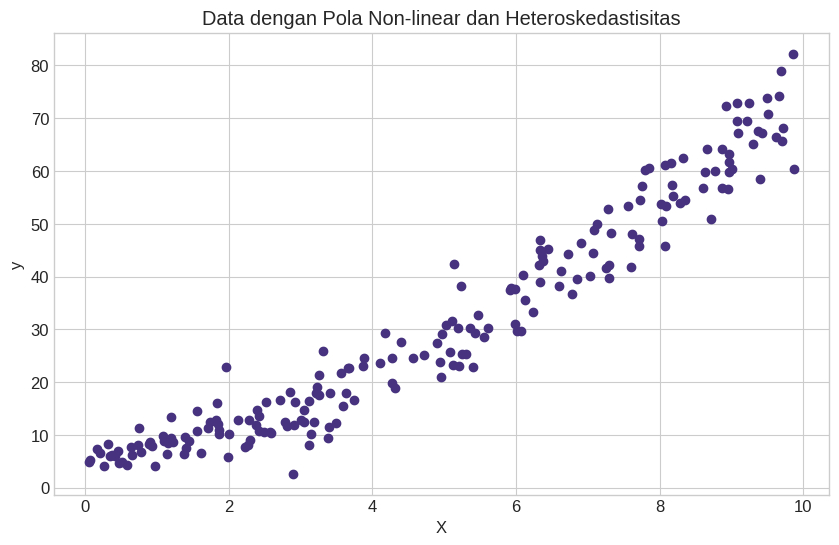

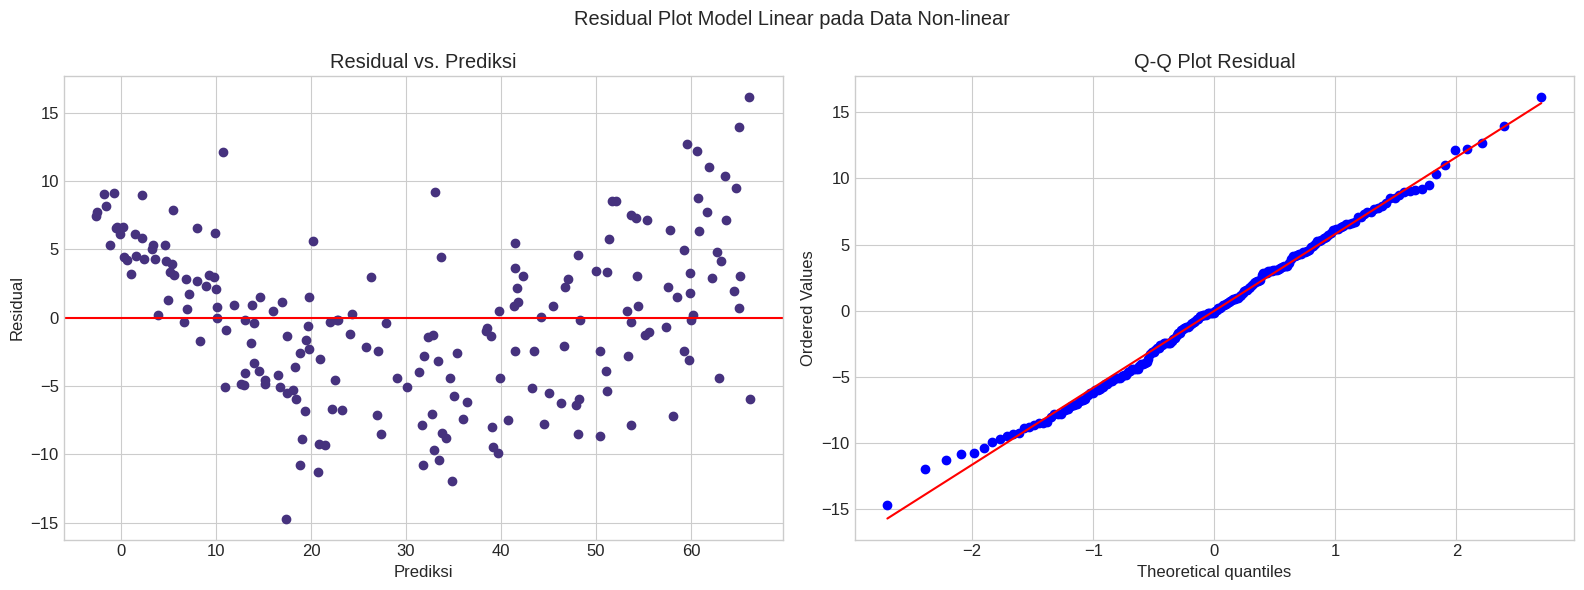

Breusch-Pagan test p-value: 0.07078842495056344
Jika p-value < 0.05, terdapat heteroskedastisitas
Test normalitas p-value: 0.36143566394105314
Jika p-value < 0.05, residual tidak berdistribusi normal


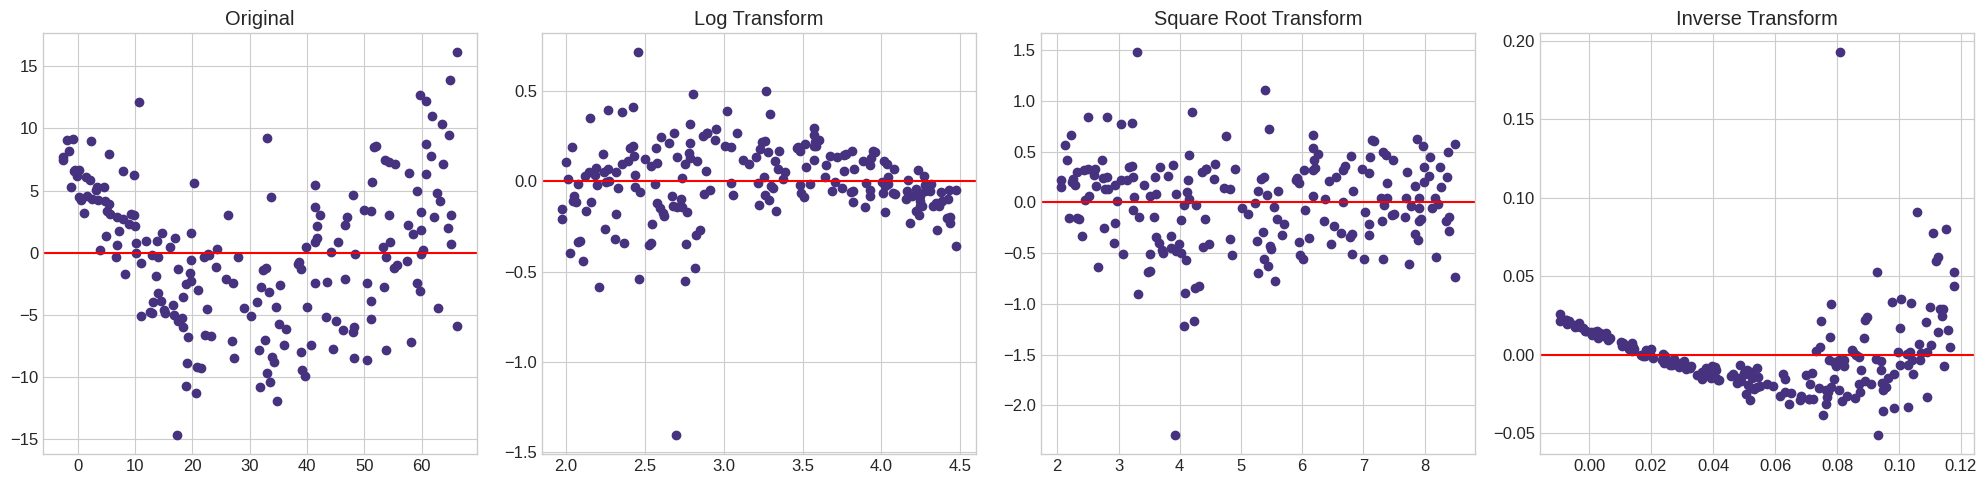

Linear: R² = 0.9055
Polynomial (degree=2): R² = 0.9436
Polynomial (degree=3): R² = 0.9426


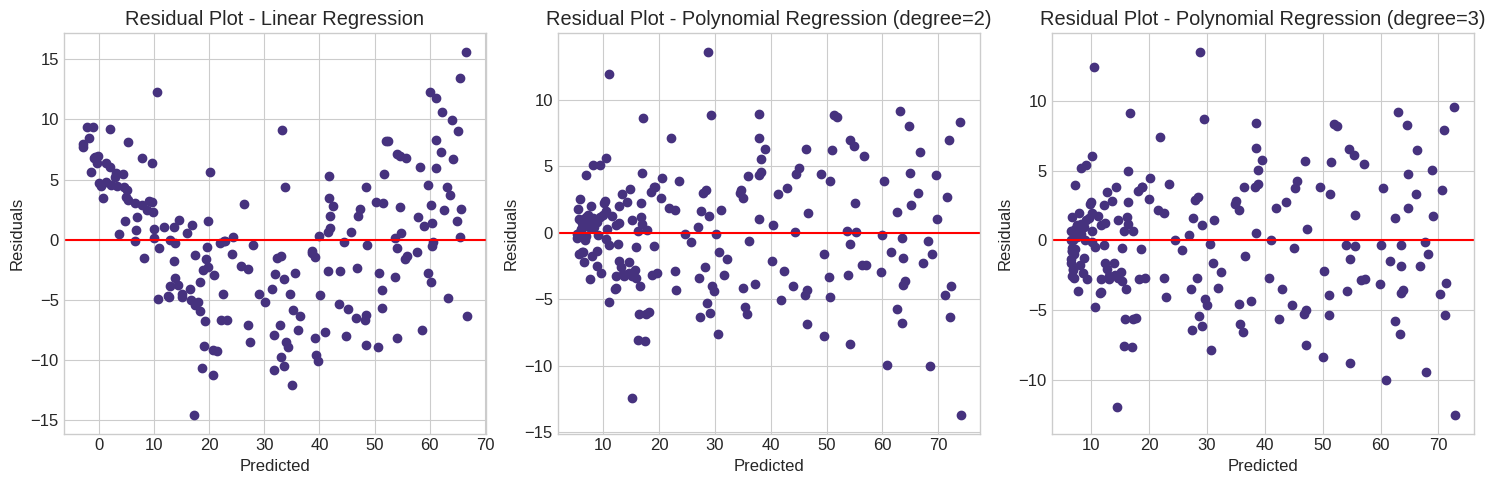

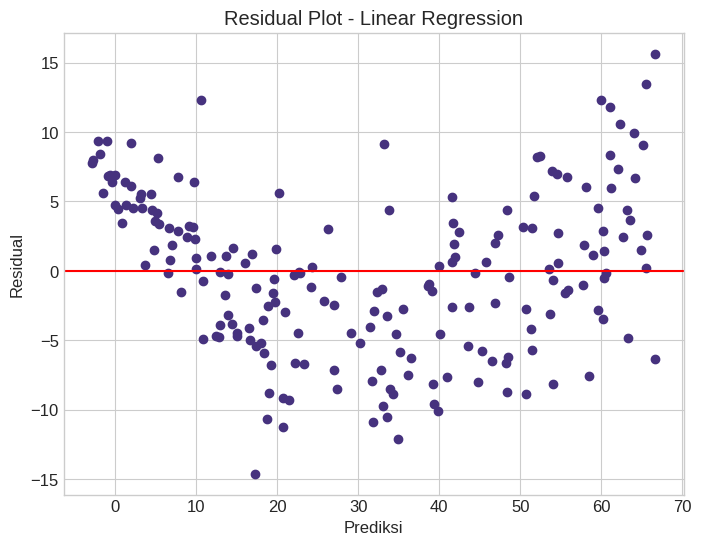

Linear Regression: R² = 0.9055
Random Forest: R² = 0.9338
Gradient Boosting: R² = 0.9264
SVR: R² = 0.9085
Model OLS awal:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     2545.
Date:                Sun, 04 May 2025   Prob (F-statistic):          5.65e-115
Time:                        11:25:55   Log-Likelihood:                -633.75
No. Observations:                 200   AIC:                             1272.
Df Residuals:                     198   BIC:                             1278.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------

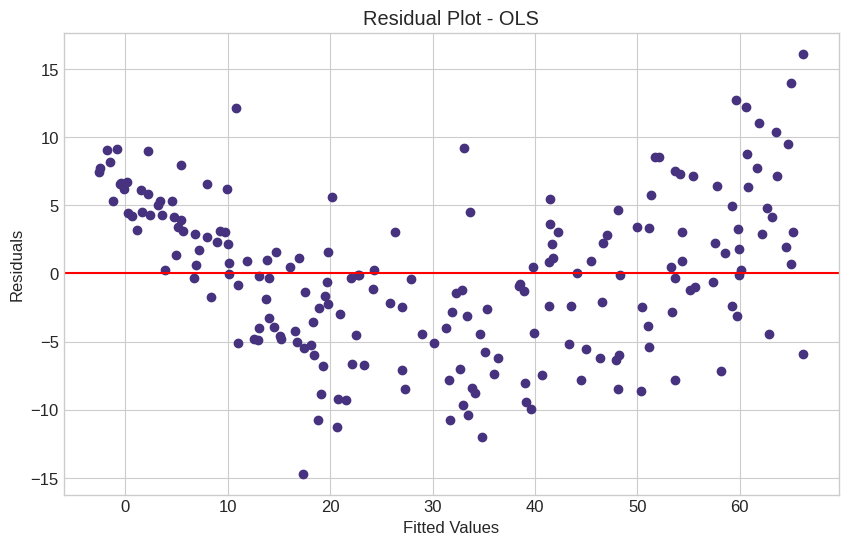


Model WLS:
                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.926
Model:                            WLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     2467.
Date:                Sun, 04 May 2025   Prob (F-statistic):          9.95e-114
Time:                        11:25:55   Log-Likelihood:                -632.26
No. Observations:                 200   AIC:                             1269.
Df Residuals:                     198   BIC:                             1275.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.3780      0.743     -3.

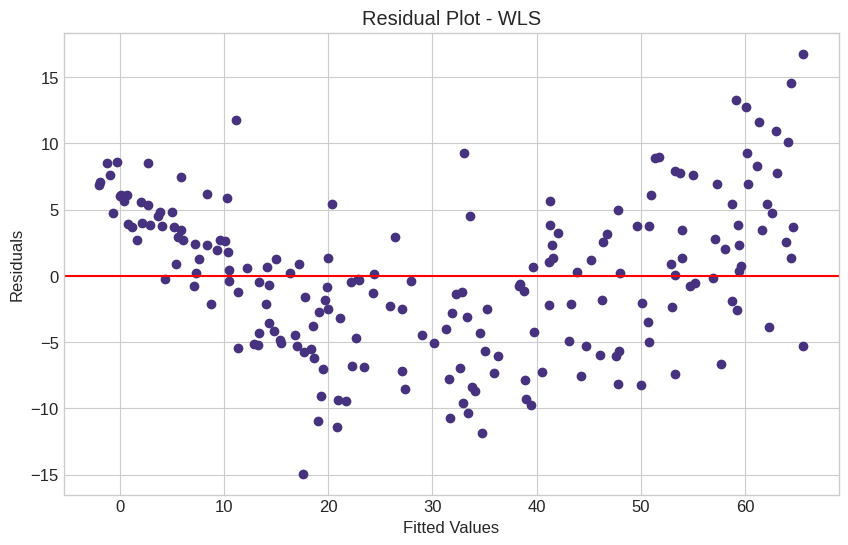

Box-Cox parameter lambda: 0.2467


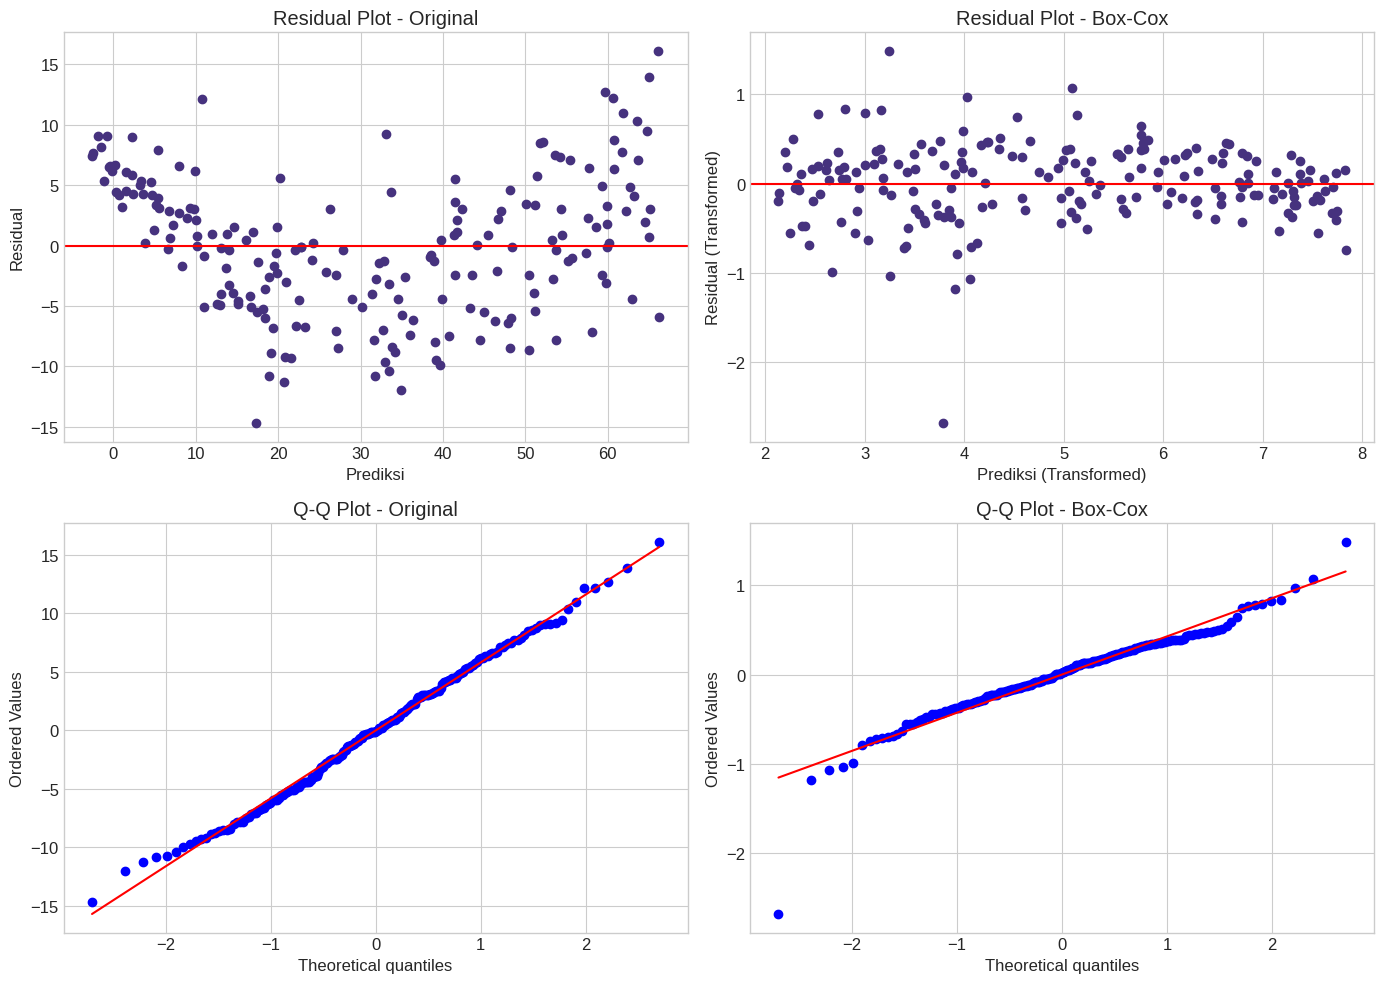

(np.float64(0.24672917177422626), LinearRegression())

In [55]:
def generate_problematic_data(n=200):
    """Menghasilkan data dengan non-linearitas dan heteroskedastisitas"""
    np.random.seed(42)

    # Fitur
    X = np.random.uniform(0, 10, (n, 1))

    # Target dengan pola non-linear (kuadratik)
    y_true = 0.5 * X**2 + 2 * X + 5

    # Tambahkan noise yang variansinya meningkat dengan X (heteroskedastisitas)
    noise_variance = np.abs(X) * 5
    noise = np.random.normal(0, np.sqrt(noise_variance).flatten())

    y = y_true.flatten() + noise

    return X, y

# Generate data
X, y = generate_problematic_data(200)

# Plot data
plt.figure(figsize=(10, 6))
plt.scatter(X, y)
plt.xlabel('X')
plt.ylabel('y')
plt.title('Data dengan Pola Non-linear dan Heteroskedastisitas')
plt.show()

X = np.column_stack((np.ones(X.shape[0]), X))

# Coba model linear sederhana
model = LinearRegression().fit(X, y)
plot_residuals(model, X, y, "Residual Plot Model Linear pada Data Non-linear")

# Coba transformasi
try_target_transformations(X, y)

# Terapkan polynomial regression
apply_polynomial_regression(X, y, degrees=[2, 3])

# Terapkan model lain
apply_other_models(X, y)

# Terapkan weighted least squares
apply_weighted_least_squares(X, y)

# Terapkan Box-Cox
apply_box_cox_transform(X, y)

### 6. Langkah-langkah Sistematis untuk Mengatasi Masalah

Berikut langkah-langkah sistematis yang bisa diikuti ketika menghadapi masalah non-linearitas dan heteroskedastisitas:

LANGKAH 1: Mendiagnosis masalah


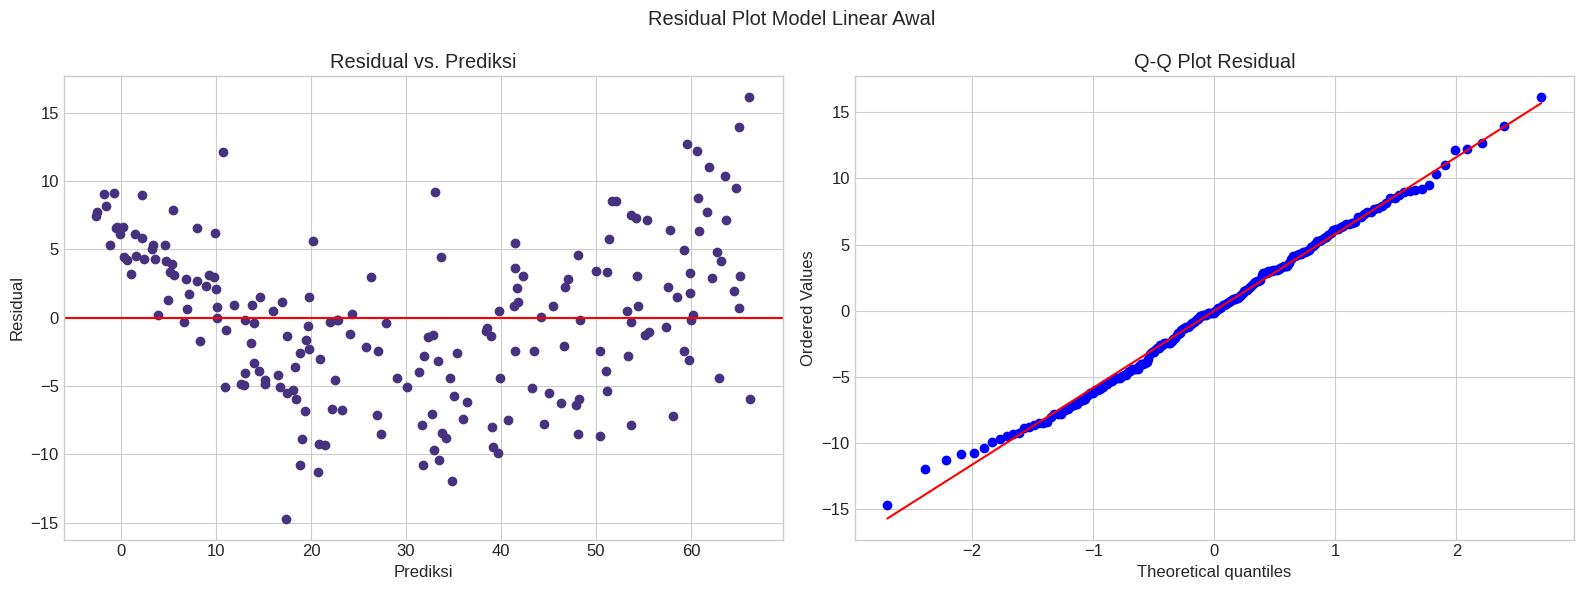

Breusch-Pagan test p-value: 0.07078842495056344
Jika p-value < 0.05, terdapat heteroskedastisitas
Test normalitas p-value: 0.36143566394105314
Jika p-value < 0.05, residual tidak berdistribusi normal

LANGKAH 2: Mengatasi non-linearitas
a. Mencoba transformasi variabel prediktor
Data multivariabel - transformasi individual perlu dilakukan per fitur

b. Mencoba transformasi variabel target


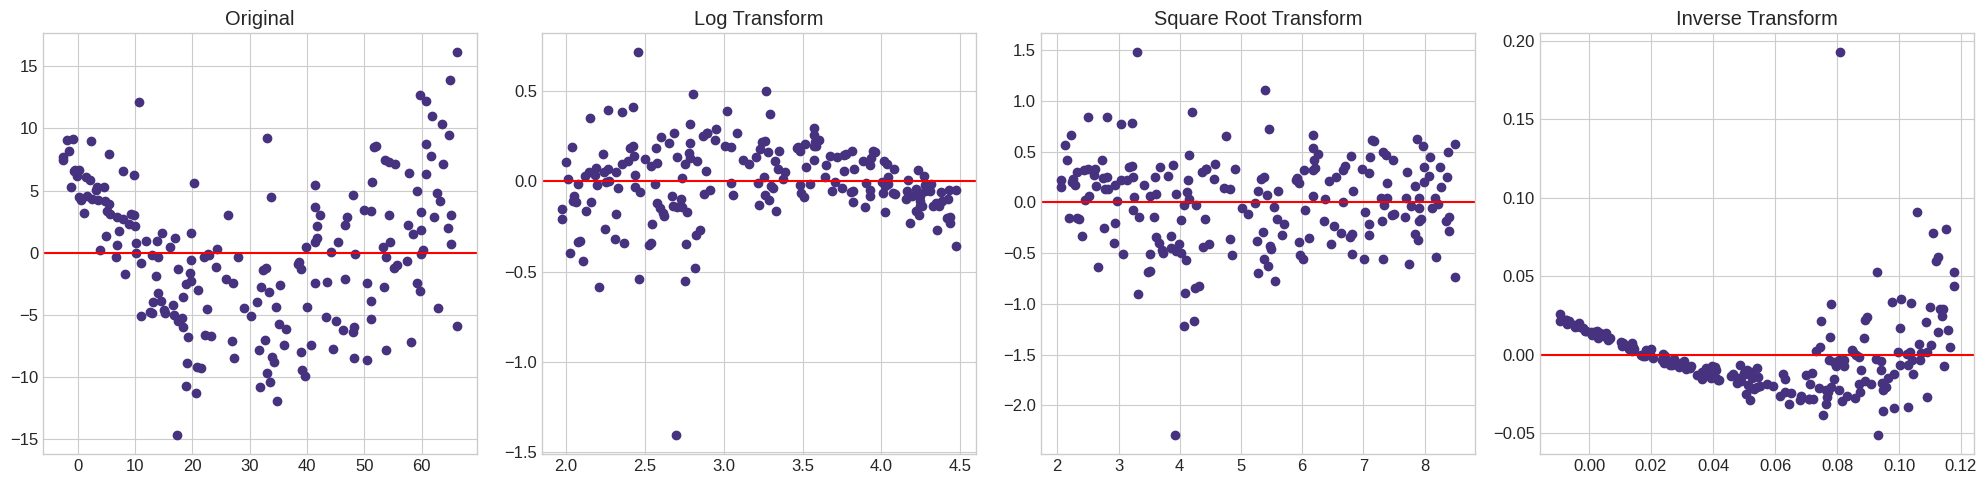


c. Mencoba polynomial regression
Linear: R² = 0.9055
Polynomial (degree=2): R² = 0.9436
Polynomial (degree=3): R² = 0.9426


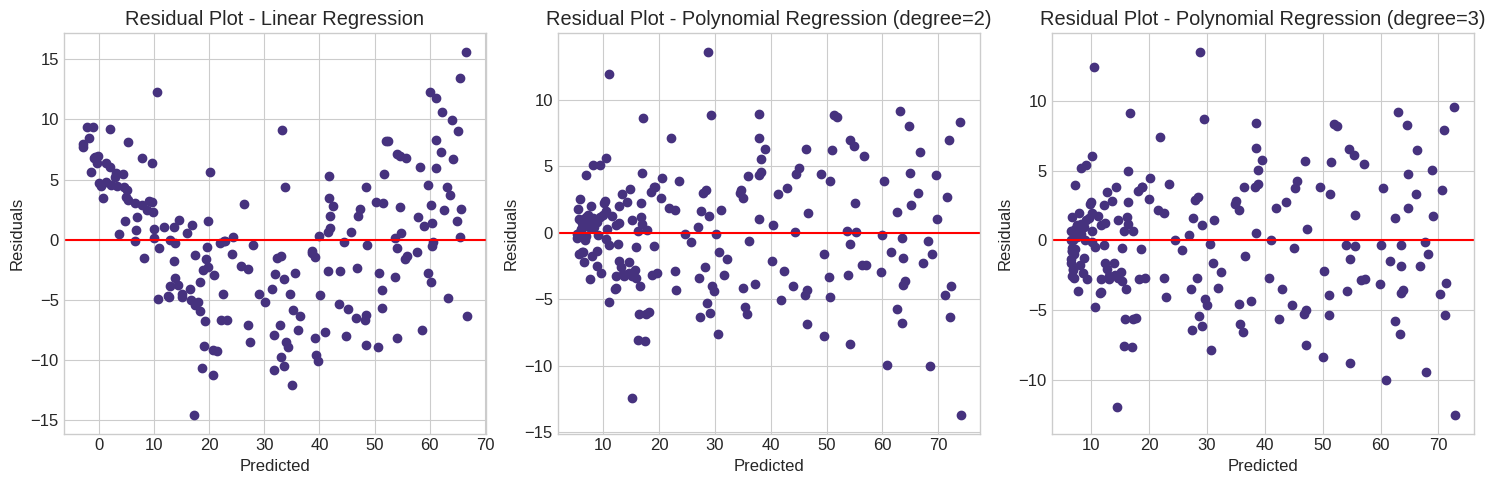


LANGKAH 3: Mengatasi heteroskedastisitas
a. Mencoba transformasi Box-Cox
Box-Cox parameter lambda: 0.2467


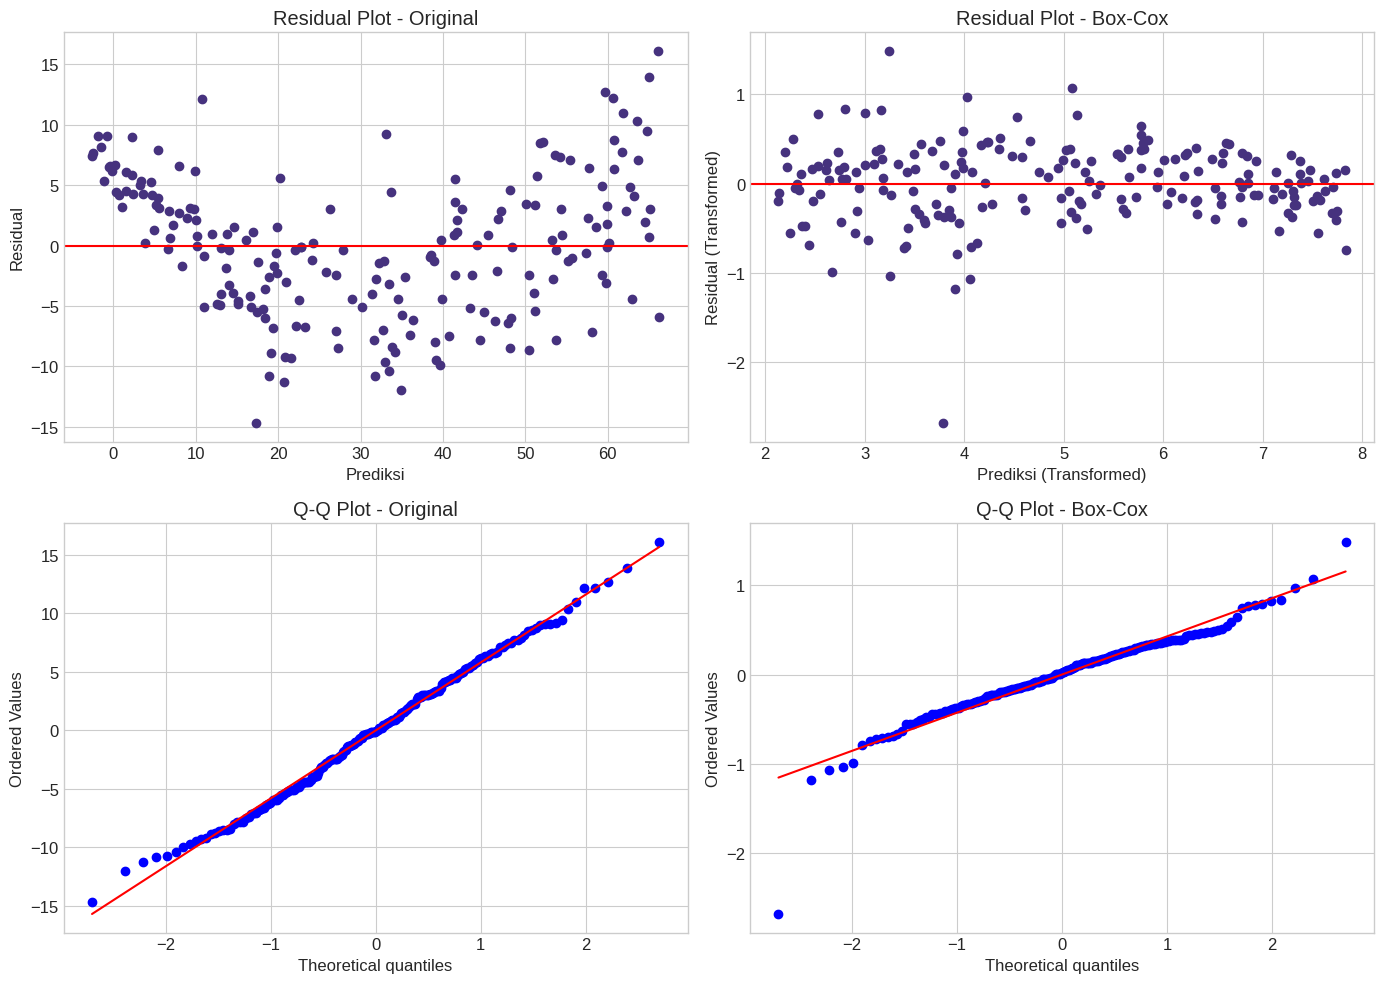


b. Mencoba Weighted Least Squares
Model OLS awal:
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.928
Model:                            OLS   Adj. R-squared:                  0.927
Method:                 Least Squares   F-statistic:                     2545.
Date:                Sun, 04 May 2025   Prob (F-statistic):          5.65e-115
Time:                        12:16:27   Log-Likelihood:                -633.75
No. Observations:                 200   AIC:                             1272.
Df Residuals:                     198   BIC:                             1278.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
c

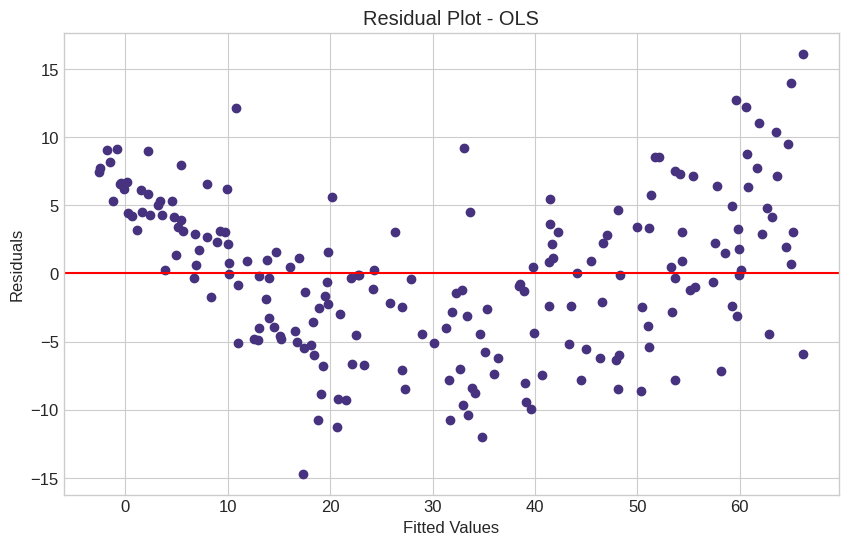


Model WLS:
                            WLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.926
Model:                            WLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     2467.
Date:                Sun, 04 May 2025   Prob (F-statistic):          9.95e-114
Time:                        12:16:27   Log-Likelihood:                -632.26
No. Observations:                 200   AIC:                             1269.
Df Residuals:                     198   BIC:                             1275.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         -2.3780      0.743     -3.

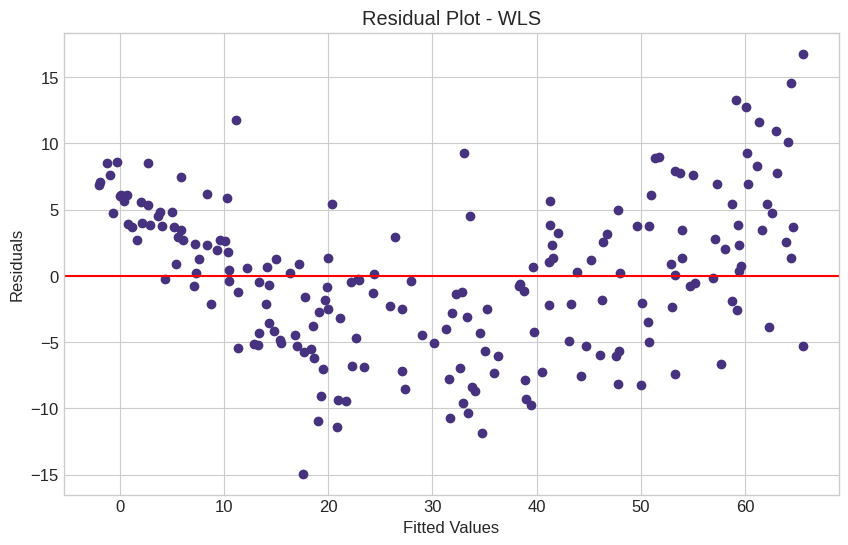


LANGKAH 4: Bandingkan dengan model alternatif


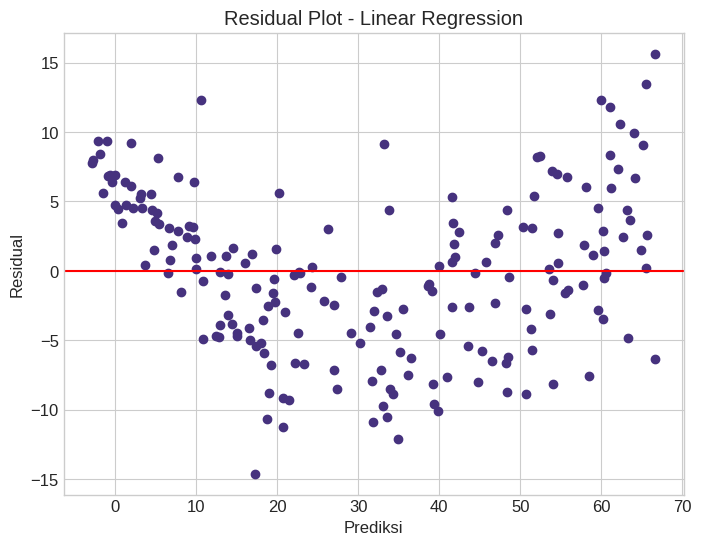

Linear Regression: R² = 0.9055
Random Forest: R² = 0.9338
Gradient Boosting: R² = 0.9264
SVR: R² = 0.9085

LANGKAH 5: Validasi model final
Pilih model terbaik berdasarkan performa dan analisis residual


In [58]:
def systematic_approach(X, y):
    print("LANGKAH 1: Mendiagnosis masalah")
    X = np.column_stack((np.ones(X.shape[0]), X))

    model_linear = LinearRegression().fit(X, y)
    plot_residuals(model_linear, X, y, "Residual Plot Model Linear Awal")

    print("\nLANGKAH 2: Mengatasi non-linearitas")
    print("a. Mencoba transformasi variabel prediktor")
    if isinstance(X, np.ndarray) and X.shape[1] == 1:
        try_feature_transformations(X, y, 0)
    else:
        print("Data multivariabel - transformasi individual perlu dilakukan per fitur")

    print("\nb. Mencoba transformasi variabel target")
    try_target_transformations(X, y)

    print("\nc. Mencoba polynomial regression")
    apply_polynomial_regression(X, y, degrees=[2, 3])

    print("\nLANGKAH 3: Mengatasi heteroskedastisitas")
    print("a. Mencoba transformasi Box-Cox")
    apply_box_cox_transform(X, y)

    print("\nb. Mencoba Weighted Least Squares")
    apply_weighted_least_squares(X, y)

    print("\nLANGKAH 4: Bandingkan dengan model alternatif")
    apply_other_models(X, y)

    print("\nLANGKAH 5: Validasi model final")
    # Di sini kita akan memilih model terbaik berdasarkan hasil sebelumnya
    # dan melakukan validasi akhir

    print("Pilih model terbaik berdasarkan performa dan analisis residual")

# Demonstrasi pendekatan sistematis
X, y = generate_problematic_data(200)
systematic_approach(X, y)

### Kesimpulan

Ketika residual plot menunjukkan pola non-linear dan heteroskedastisitas, langkah-langkah yang dapat diambil meliputi:

1. **Transformasi data** untuk mengatasi non-linearitas:
   - Transformasi variabel prediktor (X): log, sqrt, square, dll.
   - Transformasi variabel target (y): log, sqrt, Box-Cox, dll.

2. **Mengubah model** menjadi non-linear:
   - Polynomial regression
   - Model machine learning lain: Random Forest, Gradient Boosting, SVR

3. **Mengatasi heteroskedastisitas**:
   - Weighted Least Squares (WLS)
   - Transformasi Box-Cox pada variabel target
   - Robust regression

4. **Validasi model** dengan teknik cross-validation dan evaluasi residual pada data test untuk memastikan masalah telah teratasi.

Pendekatan yang tepat tergantung pada karakteristik data dan kebutuhan interpretasi model.
